In [1]:
from notebook.services.config import ConfigManager
import matplotlib.pyplot as plt
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]

# Day 4: ZTF Summer School

### Michael Coughlin <cough052@umn.edu>


with contributions totally ripped off from Gautham Narayan (UIUC)

## What is Machine Learning ?

* The umbrella term "machine learning" describes methods for *automated data analysis*, developed by computer scientists and statisticians in response to the appearance of ever larger datasets.

* What is actually being learned? With ML, you specify a notion of how to measure the distance between observations, and it learns the correlation structure and builds a model, $M$. 

* The goal of automation has led to an emphasis on non-parametric models (that adapt to dataset size and complexity), and a very uniform terminology that enables multiple models to be implemented and compared on an equal footing.

* Machine learning can be divided into two types: *supervised* and *unsupervised.* (this is for future classes)

## Supervised Learning

* Supervised learning is also known as *predictive* learning. Given *inputs* $X$, the goal is to construct a machine that can accurately predict a set of *outputs* $y$, usually so that _decisions_ can be made. 


* The "supervision" refers to the education of the machine, via a *training set* $D$ of input-output pairs that we provide. Prediction accuracy is then tested on *validation* and *test* sets.

## Supervised Learning

* At the heart of the prediction machine is a *model* $M$ that can be *trained* to give accurate predictions.

* Supervised learning is about making predictions by characterizing ${\rm Pr}(y_k|x_k,D,M)$.

* The outputs $y$ are said to be *response variables* - predictions of $y$ will be generated by our model. 

* The variables $y$ can be either *categorical* ("labels") or *nominal* (real numbers).

* When the $y$ are numerical, the problem is a *regression* ("how should we interpolate between these numerical values?").

<img src="../figures/house_price_features.png">

<img src="../figures/house_price_features_corr.png">

<img src="../figures/ml_map.png"></img>

> The [`scikit-learn` algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), as provided with the package documentation.

## Data Representations

* Each input $x$ is said to have $P$ *features* (or *attributes*), and represents a *sample* (assumed to have been drawn from a sampling distribution). Each sample input $x$ is associated with an output $y$.


* Our $N$ input *samples* are packaged into an $N \times P$ *design matrix* $X$ (with $N$ rows and $P$ columns). We've used this term before in the context of regression and you saw an example of building one with the HBM on Cepheids

<img src="../figures/ml_data_representation.svg" width=100%>

* Typically a supervised learning model is "trained" on a subset of the data, and then its ability to make predictions about new data "tested" on the remainder.

* Training involves "fitting" the model to the data, optimizing its parameters to minimize some "loss function" (or equivalently, maximize some defined "score").

<img src="../figures/ml_supervised_workflow.svg" width=100%>

<img src="../../figures/ml_train_test_split_matrix.svg" width=100%>

## Optimizing Model Prediction Accuracy

* In supervised machine learning the goal is to make the most accurate predictions we can - which means neither over-fitting nor under-fitting the data 

* The "mean squared error" between the model predictions and the truth is a useful metric: minimizing MSE corresponds to minimizing the "empirical risk," defined as the mean value loss function averaged over the available data samples, where the loss function is quadratic

<img src="../figures/overfitting_underfitting_cartoon.png">

## Decision Tree Methods

The hierarchical application of decision boundaries lead to decision trees

Tree structure:

- top node contains the entire data set
- at each branch the data are subdivided into **two** child nodes (this is the decision)
- split is based on a predefined decision boundary (usually axis aligned)
- splitting repeats, recursively, until we reach a predefined stopping criteria


Application of the tree to classification is simple (a series of binary decisions). 

The fraction of points from the training set classified as one class or the other defines the class associated with the decision.

# In-class warm-up: Look at the table below and pick the feature that is best to split on first

#### Remember that you only get to make a binary split (i.e. mild or not mild)

In [2]:
# RUN THIS
import astropy.table as at
import graphviz 
weather = at.Table.read('../data/weather_nominal.csv', format='ascii')
weather

outlook,temperature,humidity,windy,play
str8,str4,str6,str5,str3
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes


# Implementing a Single Decision Tree

In [3]:
# RUN THIS

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# convert the labels to numerical data
cols = []
new_weather = weather.copy()
for i, feature in enumerate(weather.colnames):
    le = preprocessing.LabelEncoder()
    new_weather[feature] = le.fit_transform(weather[feature])*1.
new_weather = new_weather.to_pandas()
new_weather

,outlook,temperature,humidity,windy,play
0,2.0,1.0,0.0,0.0,0.0
1,2.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,2.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0
5,1.0,0.0,1.0,1.0,0.0
6,0.0,0.0,1.0,1.0,1.0
7,2.0,2.0,0.0,0.0,0.0
8,2.0,0.0,1.0,0.0,1.0
9,1.0,2.0,1.0,0.0,1.0


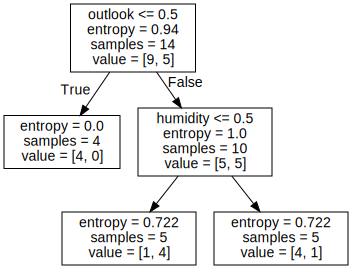

In [4]:
# get the training features and target
X_train = new_weather[weather.colnames[0:4]]
Y_train = 1.-new_weather['play']

# TWO LINES OF CODE TO IMPLEMENT A DECISION TREE

# build the decision tree
clf = DecisionTreeClassifier(max_depth = 2, criterion='entropy')

# Step 3: Train the model on the data
clf.fit(X_train, Y_train)

# Plot the Tree
dot_data = tree.export_graphviz(clf, feature_names= weather.colnames[0:4], out_file=None) 
graph = graphviz.Source(dot_data)
graph

Decision trees are simple to interpret (a set of questions).

[This structure is called a Dendrogram](https://en.wikipedia.org/wiki/Dendrogram)

<img src="../figures/tree_components.png">

Remember the bias-variance tradeoff?
<img src="../figures/overfitting_underfitting_cartoon.png">

# There's not a lot you can do with a tree structure:
<img src="../figures/tree_depth.png">

## Limiting Model Complexity
<img src="../figures/tree_limit.png">

## Pruning - getting rid of leaves that don't have large information/gini gain
<img src="../figures/tree_pruning.png">

## Regression with Trees: When the target variable is nominal 

<img src="../figures/tree_regression.png">

## But you say 

### AH BUT ENTROPY AND GINI IMPURITY ARE DEFINED AS MARGINALS OVER CATEGORICAL VARIABLES, WOE IS ME HOW COULD THESE DISTANCE METRICS EVER POSSIBLY WORK FOR VARIABLES THAT ARE CONTINUOUS 

(Well ok maybe you don't say exactly that...)


<img src="../figures/tree_regression_metric.png">

Hello old friends.

## The big issues with trees

* Variance - different trees lead to different results
    - intuitively if you have just two continuous variables, then calculating the split for every node even with a depth = 2 tree is of order $\infty^2$
    
You can view each tree as a single path that you can take do get the desired outcome.

There are many possible paths, so we do the thing we always do and marginalize over them.

In other words, go from a single decision tree to a many decision trees.


Two common ensemble methods that use decision trees:

1. Random Forests
    - Trees run in parallel, independent of each other
    - Each tree uses a random subset of the observations and features (**bagging**)
        - the number of features selected per split level is typically limited to the square root of the total number of features
    - Class predicted by majority vote - what class do most trees think an observation belongs to or average in the case of regression



2. Gradient Boosted Trees
    - Trees run in series 
    - Each tree uses different weights for the features, updating the weights from the previous tree
    - The last tree makes the prediction

# In-class warm-up: using Random Forests for regression using SDSS galaxies with known redshifts (the target) and magnitudes as features - i.e. a photo-z estimator.

@pickle_results: using precomputed results from 'photoz_forest.pkl'


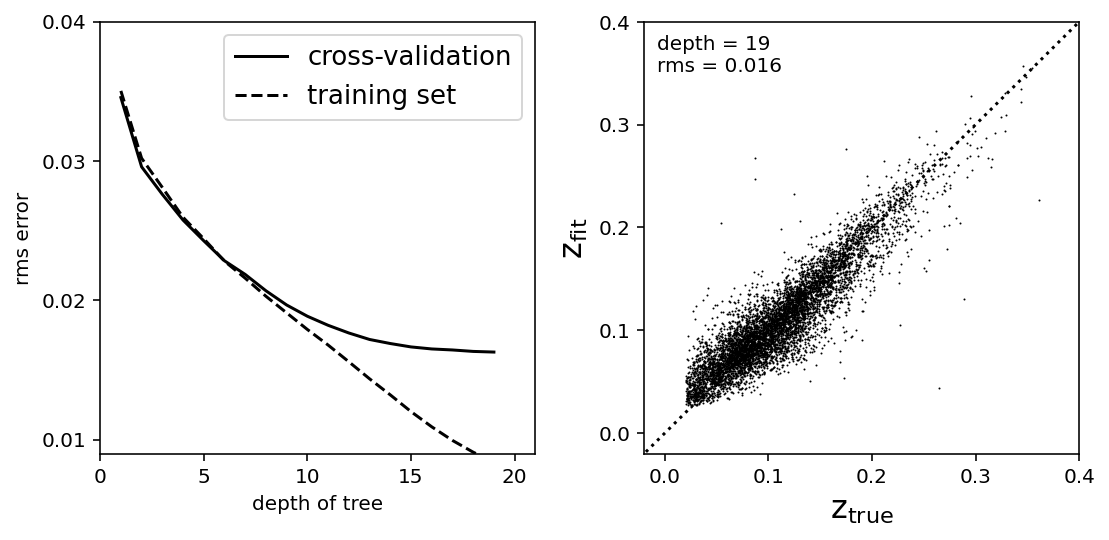

In [5]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]


#------------------------------------------------------------
# Compute the results
#  This is a long computation, so we'll save the results to a pickle.
@pickle_results('photoz_forest.pkl')
def compute_photoz_forest(depth):
    rms_test = np.zeros(len(depth))
    rms_train = np.zeros(len(depth))
    i_best = 0
    z_fit_best = None

    for i, d in enumerate(depth):
        # YOUR CODE HERE
        clf = RandomForestRegressor(n_estimators=100, max_depth=d)
        clf.fit(mag_train, z_train)

        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best


depth = np.arange(1, 20)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(depth)
best_depth = depth[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(depth, rms_test, '-k', label='cross-validation')
ax.plot(depth, rms_train, '--k', label='training set')
ax.legend(loc=1, prop=dict(size=13))

ax.set_xlabel('depth of tree')
ax.set_ylabel('rms error')

ax.set_xlim(0, 21)
ax.set_ylim(0.009,  0.04)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

# right panel: plot best fit
ax = fig.add_subplot(122)
ax.scatter(z_test, z_fit_best, s=1, lw=0, c='k')
ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.03, 0.97, "depth = %i\nrms = %.3f" % (best_depth, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\rm z_{true}$', fontsize=16)
ax.set_ylabel(r'$\rm z_{fit}$', fontsize=16)

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

# In-class exercise: using Gradient Boosting for regression on the same data set

@pickle_results: using precomputed results from 'photoz_boosting.pkl'


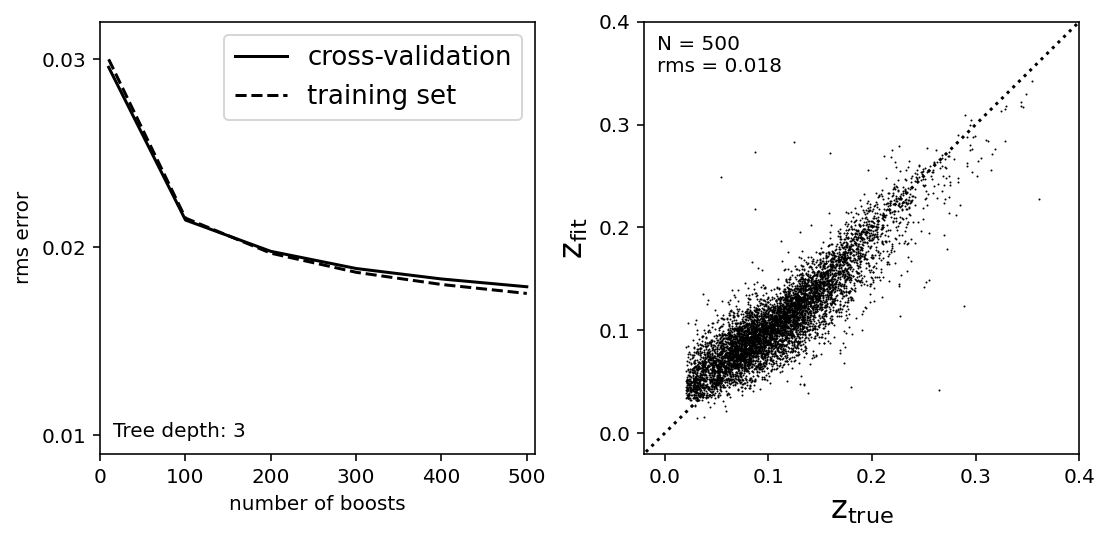

In [6]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from astroML.datasets import fetch_sdss_specgals
from astroML.decorators import pickle_results

#------------------------------------------------------------
# Fetch and prepare the data
data = fetch_sdss_specgals()

# put magnitudes in a matrix
mag = np.vstack([data['modelMag_%s' % f] for f in 'ugriz']).T
z = data['z']

# train on ~60,000 points
mag_train = mag[::10]
z_train = z[::10]

# test on ~6,000 distinct points
mag_test = mag[1::100]
z_test = z[1::100]


#------------------------------------------------------------
# Compute the results
#  This is a long computation, so we'll save the results to a pickle.
@pickle_results('photoz_boosting.pkl')
def compute_photoz_forest(N_boosts):
    rms_test = np.zeros(len(N_boosts))
    rms_train = np.zeros(len(N_boosts))
    i_best = 0
    z_fit_best = None

    for i, Nb in enumerate(N_boosts):
        # YOUR CODE HERE
        clf = GradientBoostingRegressor(n_estimators=Nb)
        clf.fit(mag_train, z_train)


        z_fit_train = clf.predict(mag_train)
        z_fit = clf.predict(mag_test)
        rms_train[i] = np.mean(np.sqrt((z_fit_train - z_train) ** 2))
        rms_test[i] = np.mean(np.sqrt((z_fit - z_test) ** 2))

        if rms_test[i] <= rms_test[i_best]:
            i_best = i
            z_fit_best = z_fit

    return rms_test, rms_train, i_best, z_fit_best

N_boosts = (10, 100, 200, 300, 400, 500)
rms_test, rms_train, i_best, z_fit_best = compute_photoz_forest(N_boosts)
best_N = N_boosts[i_best]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.25,
                    left=0.1, right=0.95,
                    bottom=0.15, top=0.9)

# left panel: plot cross-validation results
ax = fig.add_subplot(121)
ax.plot(N_boosts, rms_test, '-k', label='cross-validation')
ax.plot(N_boosts, rms_train, '--k', label='training set')
ax.legend(loc=1, prop=dict(size=13))

ax.set_xlabel('number of boosts')
ax.set_ylabel('rms error')
ax.set_xlim(0, 510)
ax.set_ylim(0.009,  0.032)
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

ax.text(0.03, 0.03, "Tree depth: 3",
        ha='left', va='bottom', transform=ax.transAxes)

# right panel: plot best fit
ax = fig.add_subplot(122)
ax.scatter(z_test, z_fit_best, s=1, lw=0, c='k')
ax.plot([-0.1, 0.4], [-0.1, 0.4], ':k')
ax.text(0.03, 0.97, "N = %i\nrms = %.3f" % (best_N, rms_test[i_best]),
        ha='left', va='top', transform=ax.transAxes)

ax.set_xlabel(r'$\rm z_{true}$', fontsize=16)
ax.set_ylabel(r'$\rm z_{fit}$', fontsize=16)

ax.set_xlim(-0.02, 0.4001)
ax.set_ylim(-0.02, 0.4001)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.show()

## What intuition am I supposed to take from the clustering methods?

Structure exists on nearly all scales in the universe. Matter clumps under its own gravity into planets, stars, galaxies, clusters, and superclusters. Beyond even these in scale are the filaments and voids. The largest of these filaments is known as the Sloan Great Wall. This giant string of galaxies is 1.4 billion light years across making it the largest known structure in the universe. 

The study of such properties will help astronomers to test cosmological models that predict galactic structure formation. The models generally fall short in creating the size, morphology and distribution of the formations we see, which arise from density fluctuations initially present during the Big Bang. As such, understanding the structures they formed will help astronomers to understand these perturbations in greater detail and, in turn, what physics would be necessary to achieve them.

## Density-based clustering

- Rather than a linkage based approach that which considers $k$ neighbors to each point (regardless of distance modulo some overall distance threshold), these approaches look at how closely packed points are - i.e. the **local density**

- Points that are in low-density regions are marked as **outliers**
    - effectively demand that each point have at least MinPts neighbors within some distance, epsilon


Implementation:
    - Pick a random point in the data that hasn't been checked yet
    - Given some epsilon, find if there are at least MinPts within epsilon of point
        - if yes
            - start a cluster
        - else
            - mark as noise (may be later marked as member of a different cluster)
        - mark any points within epsilon of cluster points as also part of the cluster
        - grow cluster until there are no other points that can be added
    - repeat until all points visited          

- Common implementations: DBSCAN and OPTICS (both in `sklearn.cluster`)
    - OPTICS handles clusters with different densities better but is significantly slower
- not completely deterministic - depends on order points are visited, but still **agglomerative** (compare vs decision trees that splits the data up into smaller groups - **divisive** 
- still don't need to specify a number of clusters or cluster centers/widths - i.e. clusters can have arbitrary shapes rather than say a GMM
    - can be fiddly and needs some fine-tuning of epsilon **LOOK AT YOUR DATA**
    

 ## Uses in Astrophysics 
 
 <img src="../figures/gamma_DBSCAN.jpg">
 
 Finding clusters in Fermi-LAT $\gamma$ ray data: https://www.aanda.org/articles/aa/abs/2013/01/aa20133-12/aa20133-12.html
 
 
Gamma-ray astronomers could feasibly name all their photons, so finding clusters this way is really looking for overdensities on a map that is otherwise white noise - because number counts are so low, detections are very significant, but this is a way to automate over large area
 

The opposite problem also works - the background is high and the clusters are barely variation on the background:

<img src="../figures/GAIA_DR2_clusters.jpg">

And of course, you don't have to do this in RA, Dec space at all - here in 15 dimensional PCA on spectra space:

<img src="../figures/Clustering_chem_abundances.png">

# In-class warm-up

There's some noisy real color-magnitude data for stars in `colormag.csv`

1. preprocess the data (i.e. scale the magnitudes and colors in some way that makes your results insensitive to the scale of the values

2. use k-means, GMMs, hierarchical clustering and DBSCAN to cluster the dataset into similar groups. You can pick the sizes of clusters/initial estimates for parameters however you like

3. in each case, the clustering instance that you create will have a `.labels_` attribute - use this to color the points in a scatter plot 

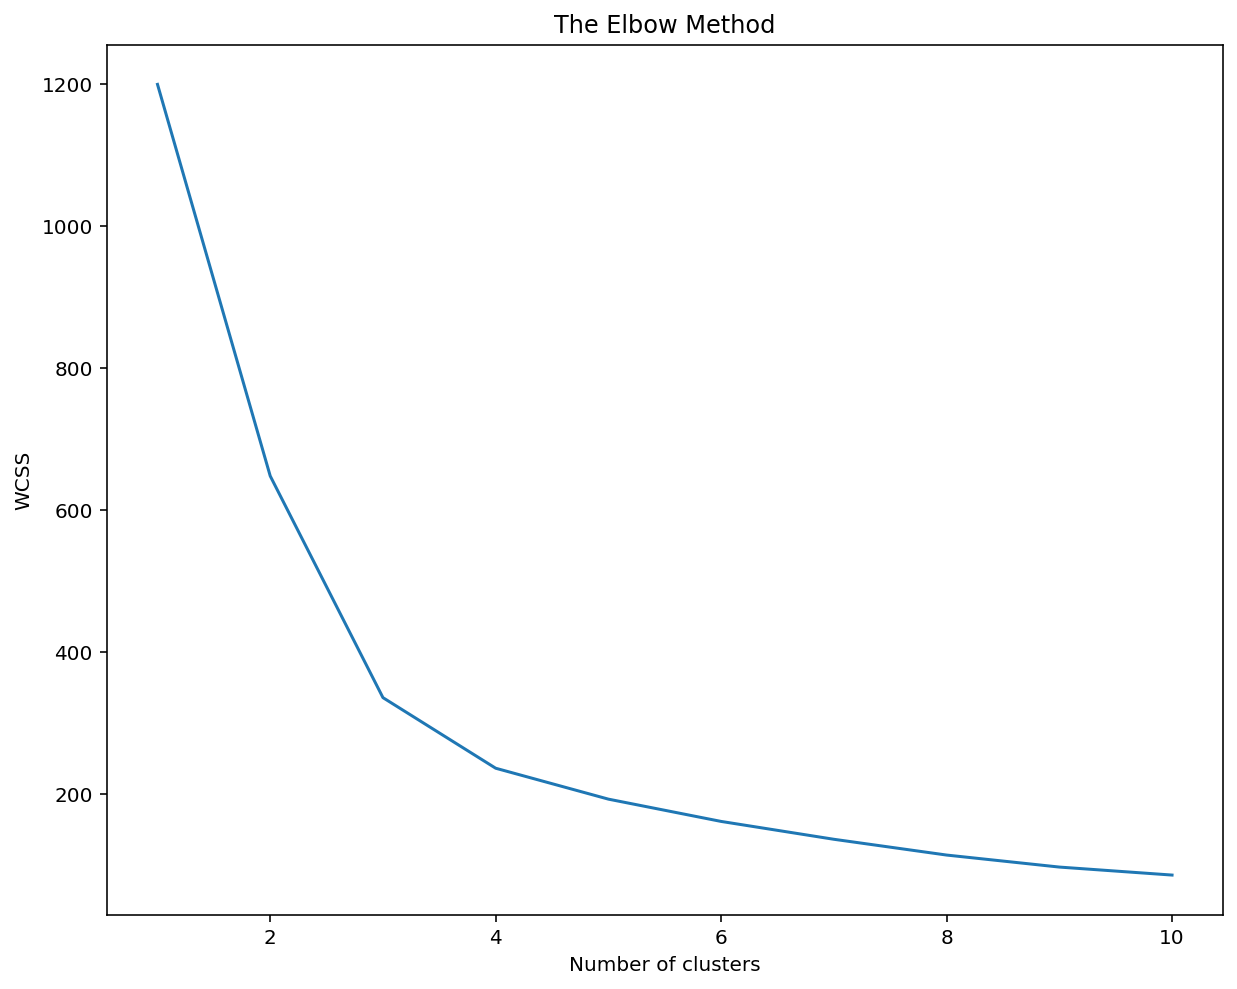

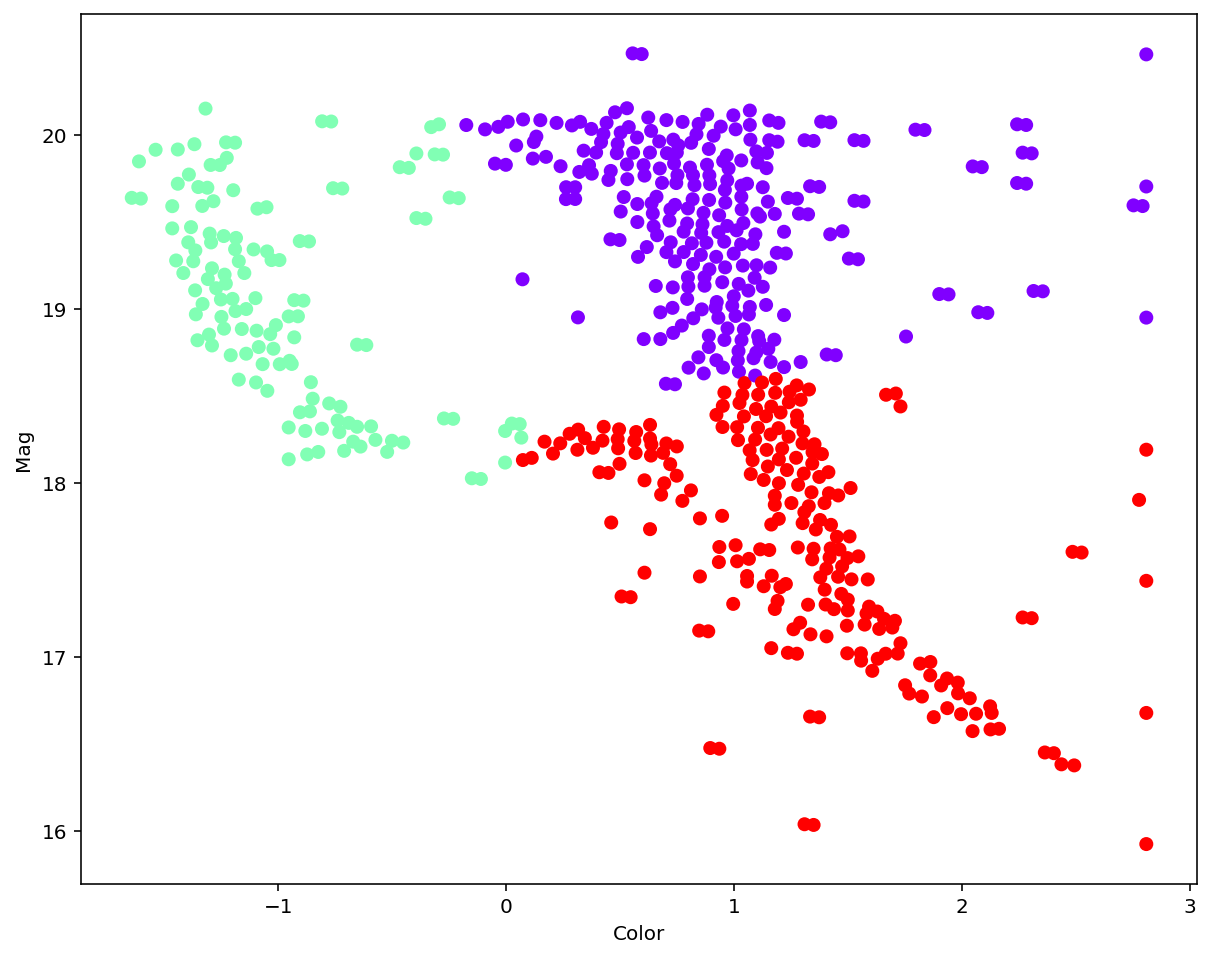

In [7]:
## YOUR SOLUTION HERE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X = pd.read_csv('../data/colormag.csv', names=['color', 'mag'])
#scale magnitudes and colours to make results insensitive to scale of data
mean_mag = np.mean(X['mag'])
mean_color = np.mean(X['color'])
X['mag'] = (X['mag'] - mean_mag) / X['mag'].std()
X['color'] = (X['color'] - mean_color) / X['color'].std()
#use the elbow method to check optimal nmber of neighbours in X 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#use kmeans to cluster X
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#assign labels to each point
labels = kmeans.predict(X)
# invert the scaling 
X['mag'] = (X['mag'] * X['mag'].std()) + mean_mag
X['color'] = (X['color'] * X['color'].std()) + mean_color
#plot the data
plt.scatter(X['color'], X['mag'], c=labels, cmap='rainbow')
plt.xlabel('Color')
plt.ylabel('Mag')
plt.show()


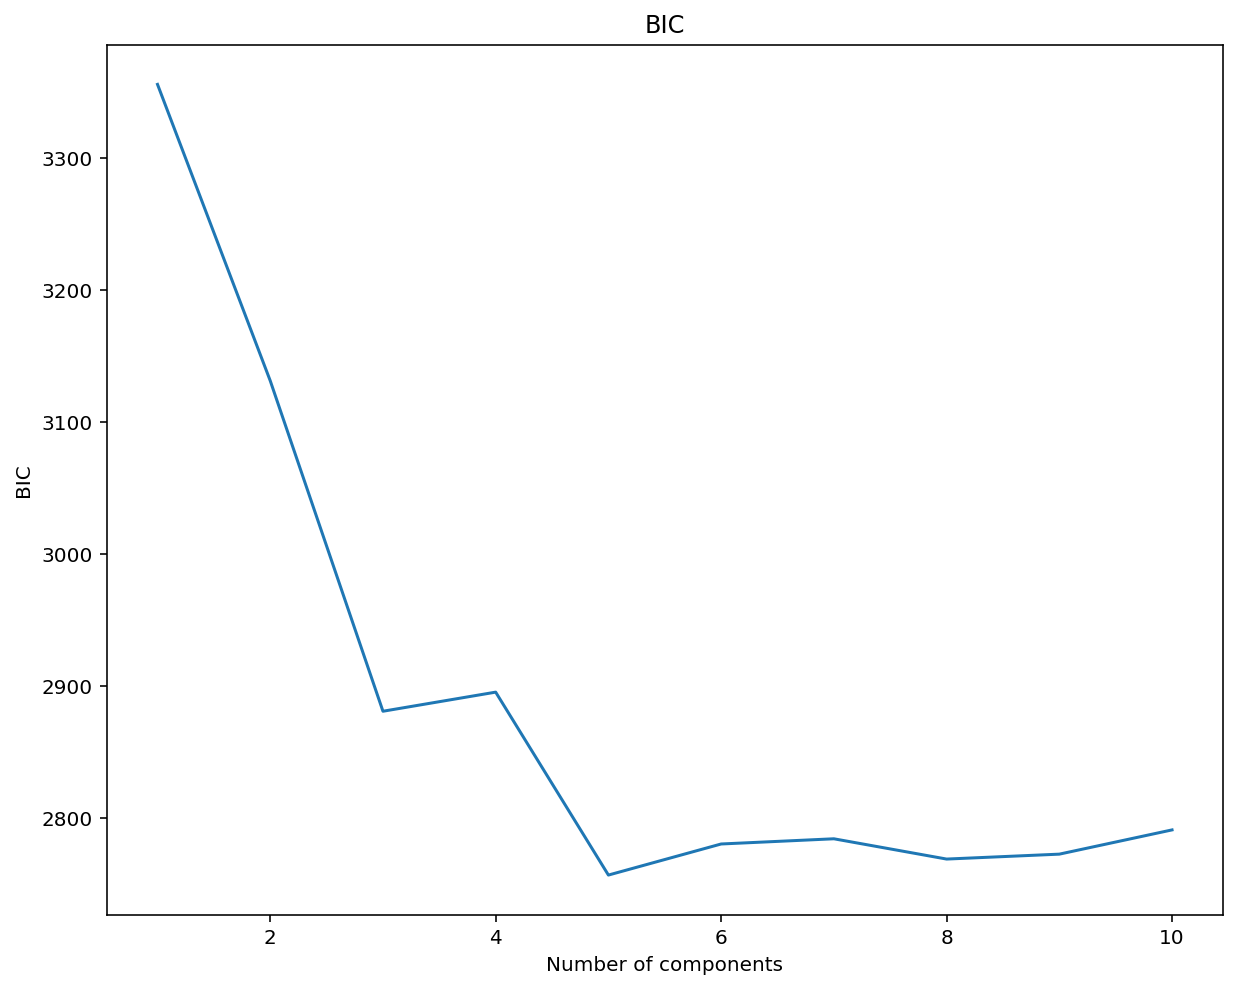

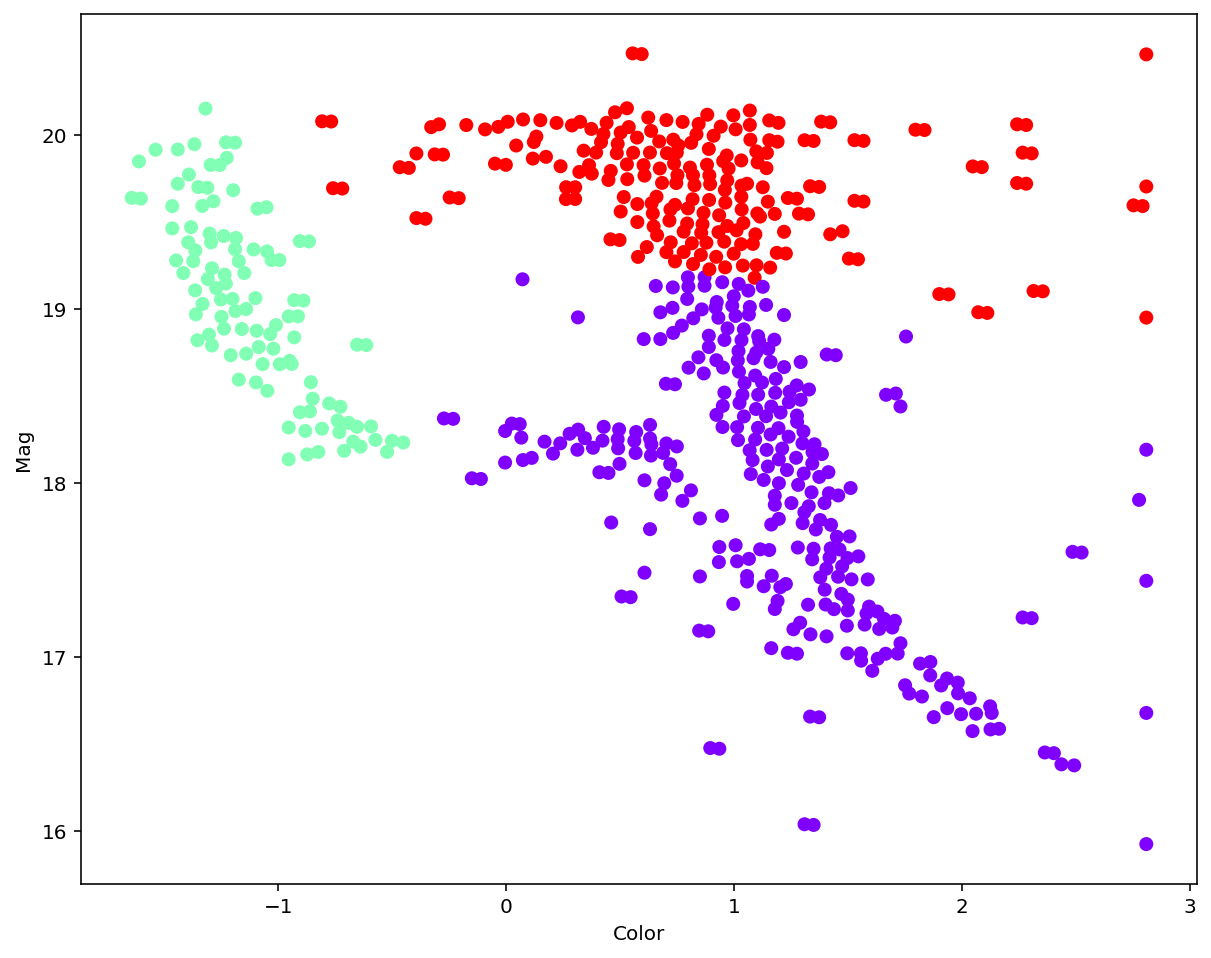

In [8]:
#use gmm to cluster X
from sklearn.mixture import GaussianMixture
X = pd.read_csv('../data/colormag.csv', names=['color', 'mag'])
#scale magnitudes and colours to make results insensitive to scale of data
mean_mag = np.mean(X['mag'])
mean_color = np.mean(X['color'])
X['mag'] = (X['mag'] - mean_mag) / X['mag'].std()
X['color'] = (X['color'] - mean_color) / X['color'].std()
#check for optimum number of compoenents from gmm using bic
from sklearn.mixture import GaussianMixture
bic = []
for i in range(1, 11):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(X)
    bic.append(gmm.bic(X))
plt.plot(range(1, 11), bic)
plt.title('BIC')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.show()

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels = gmm.predict(X)
# invert the scaling
X['mag'] = (X['mag'] * X['mag'].std()) + mean_mag
X['color'] = (X['color'] * X['color'].std()) + mean_color
#plot the data
plt.scatter(X['color'], X['mag'], c=labels, cmap='rainbow')
plt.xlabel('Color')
plt.ylabel('Mag')
plt.show()

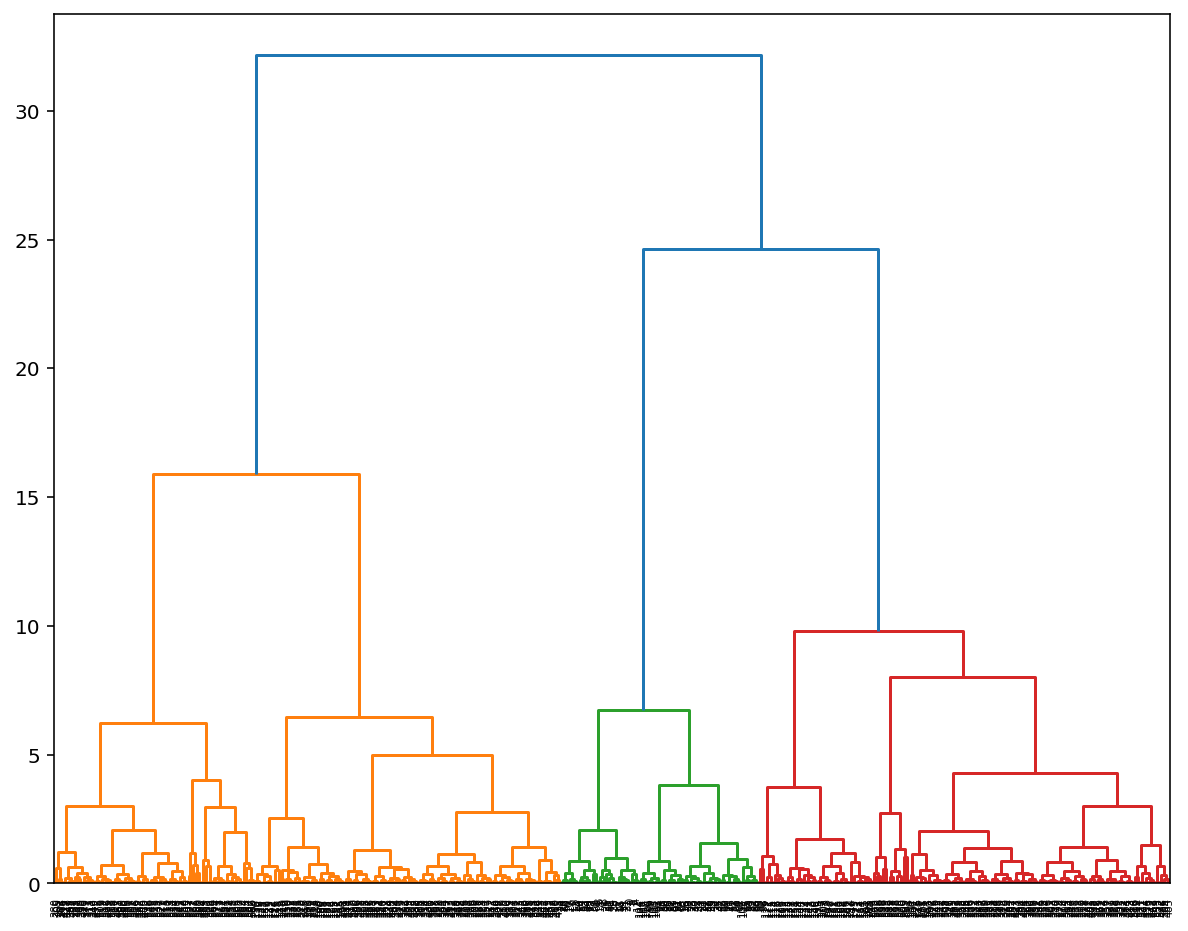

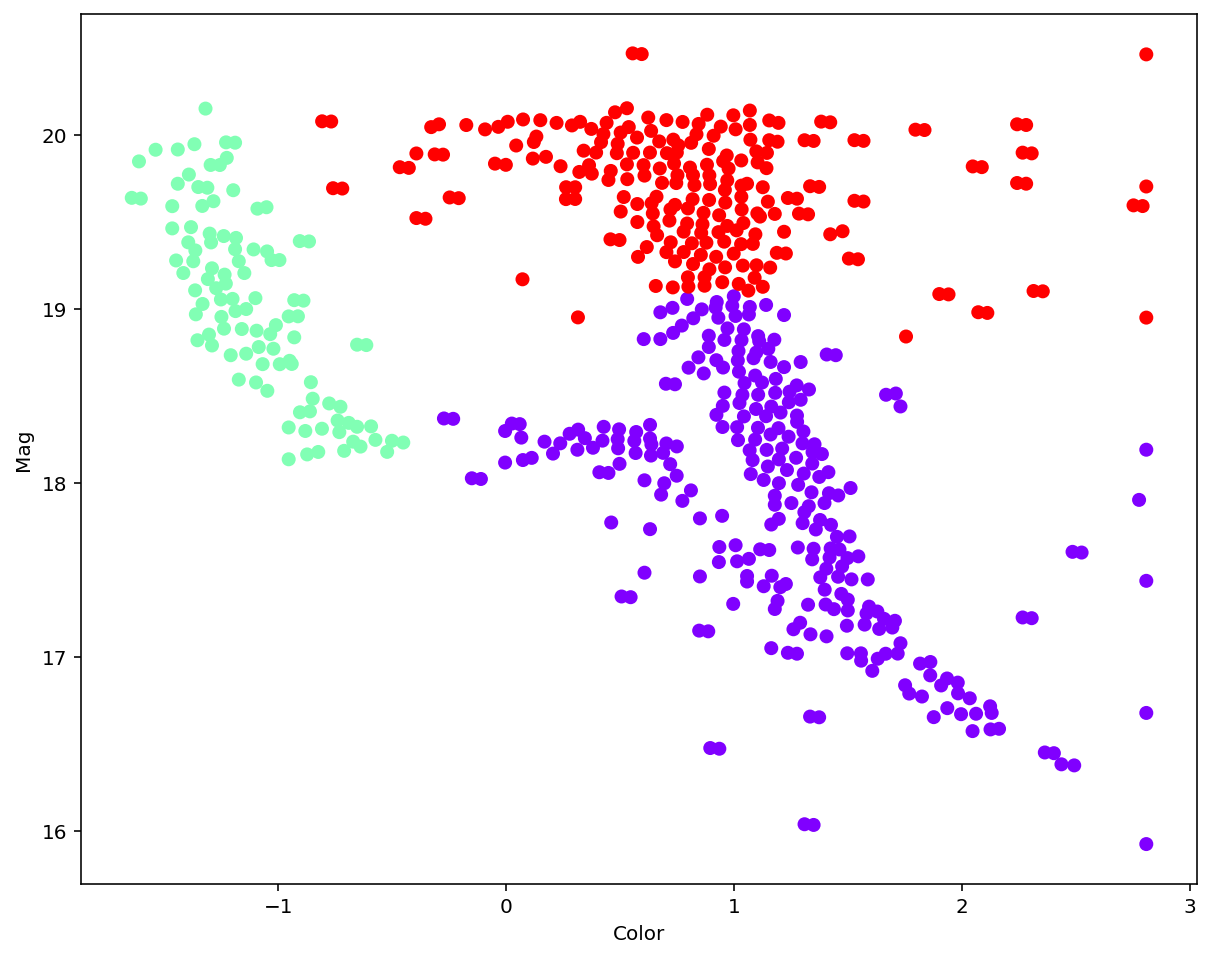

In [9]:
#use hierarchical clustering to cluster X
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
X = pd.read_csv('../data/colormag.csv', names=['color', 'mag'])
#scale magnitudes and colours to make results insensitive to scale of data
mean_mag = np.mean(X['mag'])
mean_color = np.mean(X['color'])
X['mag'] = (X['mag'] - mean_mag) / X['mag'].std()
X['color'] = (X['color'] - mean_color) / X['color'].std()
#link the data
Z = linkage(X, 'ward')
#plot the dendrogram
dendrogram(Z, labels=X.index, leaf_rotation=90)
plt.show()
#cluster the data
clusters = fcluster(Z, 3, criterion='maxclust')
#invert the scaling
X['mag'] = (X['mag'] * X['mag'].std()) + mean_mag
X['color'] = (X['color'] * X['color'].std()) + mean_color
#plot the data
plt.scatter(X['color'], X['mag'], c=clusters, cmap='rainbow')
plt.xlabel('Color')
plt.ylabel('Mag')
plt.show()

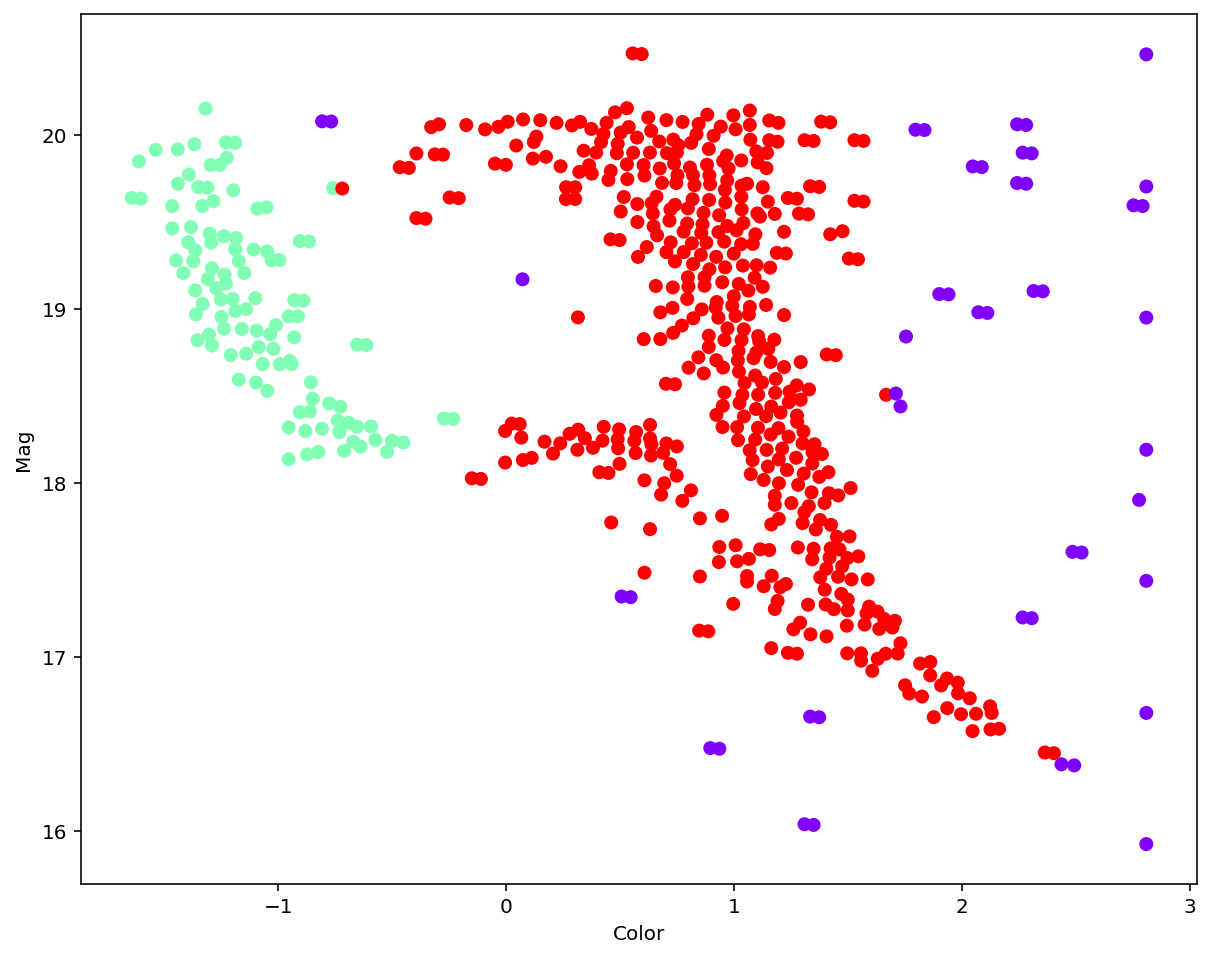

In [10]:
#use DBScan to cluster X
from sklearn.cluster import DBSCAN
X = pd.read_csv('../data/colormag.csv', names=['color', 'mag'])
#scale magnitudes and colours to make results insensitive to scale of data
mean_mag = np.mean(X['mag'])
mean_color = np.mean(X['color'])
X['mag'] = (X['mag'] - mean_mag) / X['mag'].std()
X['color'] = (X['color'] - mean_color) / X['color'].std()
# fit a DBSCAN model to the data
db = DBSCAN(eps=0.32, min_samples=10).fit(X)
# predict the clusters
labels = db.labels_

#invert the scaling
X['mag'] = (X['mag'] * X['mag'].std()) + mean_mag
X['color'] = (X['color'] * X['color'].std()) + mean_color
#plot the data
plt.scatter(X['color'], X['mag'], c=labels, cmap='rainbow')
plt.xlabel('Color')
plt.ylabel('Mag')
plt.show()

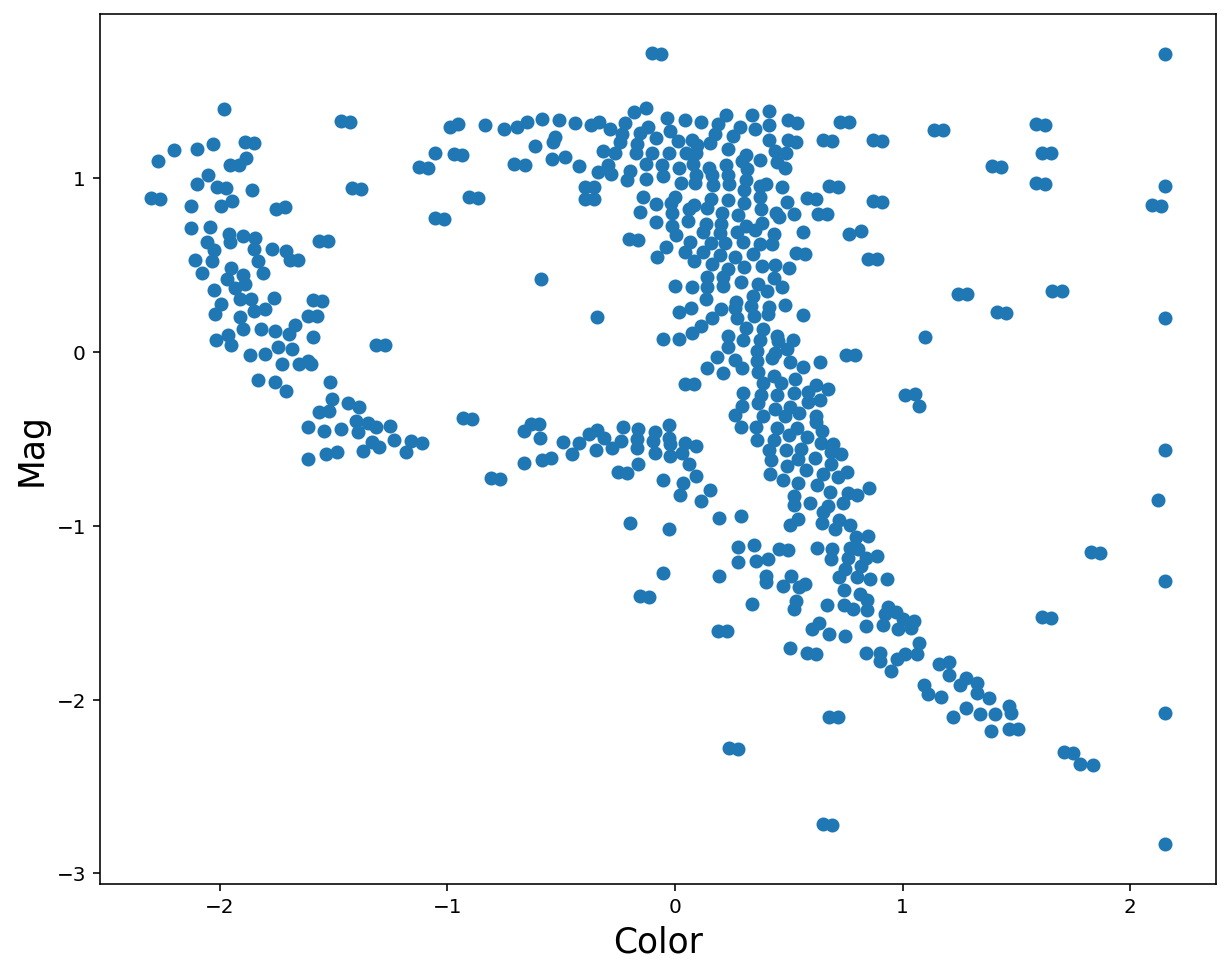

In [11]:
import sklearn
from sklearn.preprocessing import StandardScaler
X = pd.read_csv('../data/colormag.csv', names=['color', 'mag'])
z = StandardScaler()
Xt = z.fit_transform(X)

plt.scatter(Xt[:,0], Xt[:,1])
ax = plt.gca()
ax.set_xlabel('Color', fontsize='xx-large')
ax.set_ylabel('Mag', fontsize='xx-large');

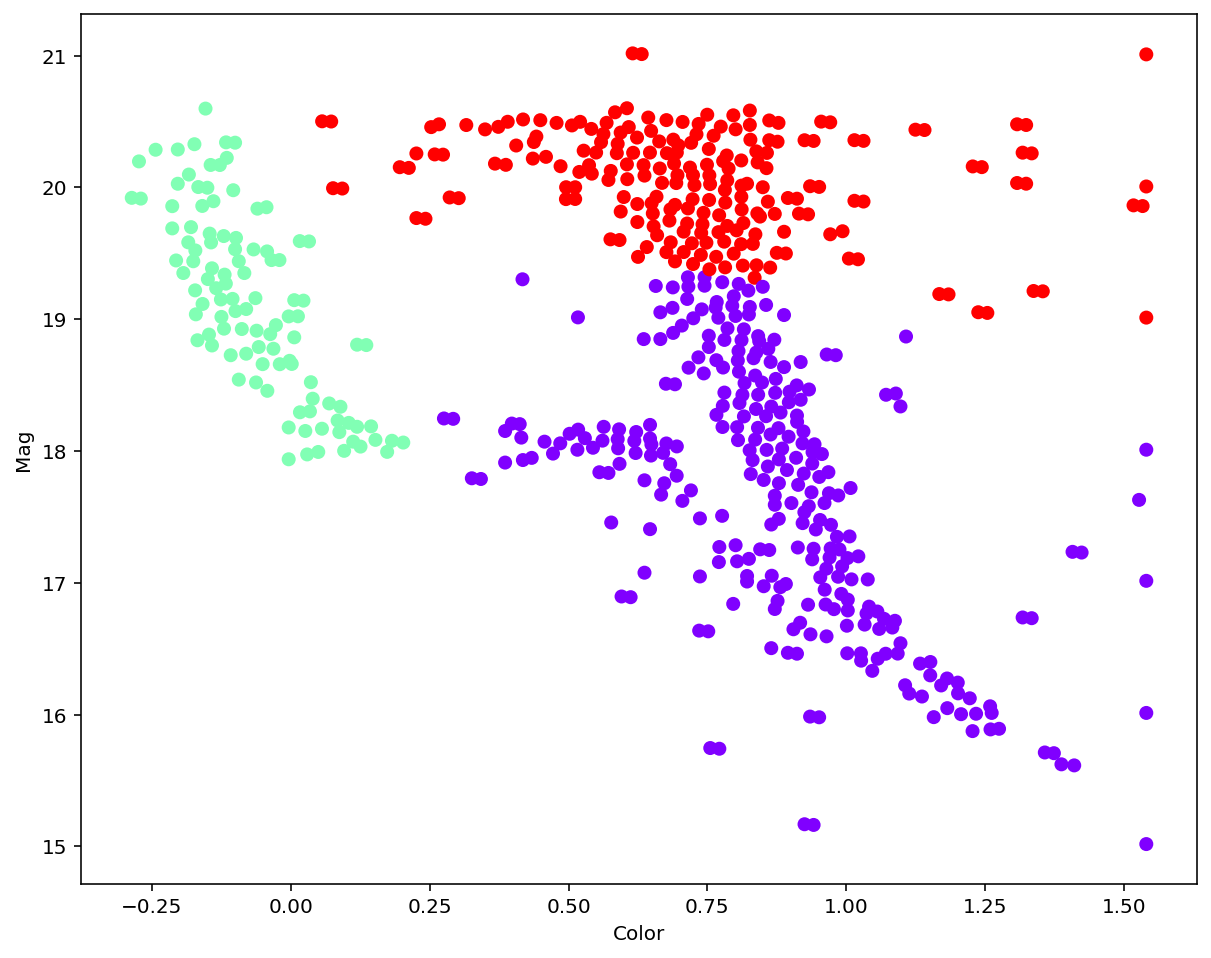

In [12]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, KMeans

# YOUR CODE HERE
gmm = GaussianMixture(n_components=3)
gmm.fit(Xt)
labels = gmm.predict(Xt)
#merge the scaled data back to the original data
Xt = z.inverse_transform(Xt)
#plot the data
plt.scatter(Xt[:,0], Xt[:,1], c=labels, cmap='rainbow')
plt.xlabel('Color')
plt.ylabel('Mag')
plt.show()



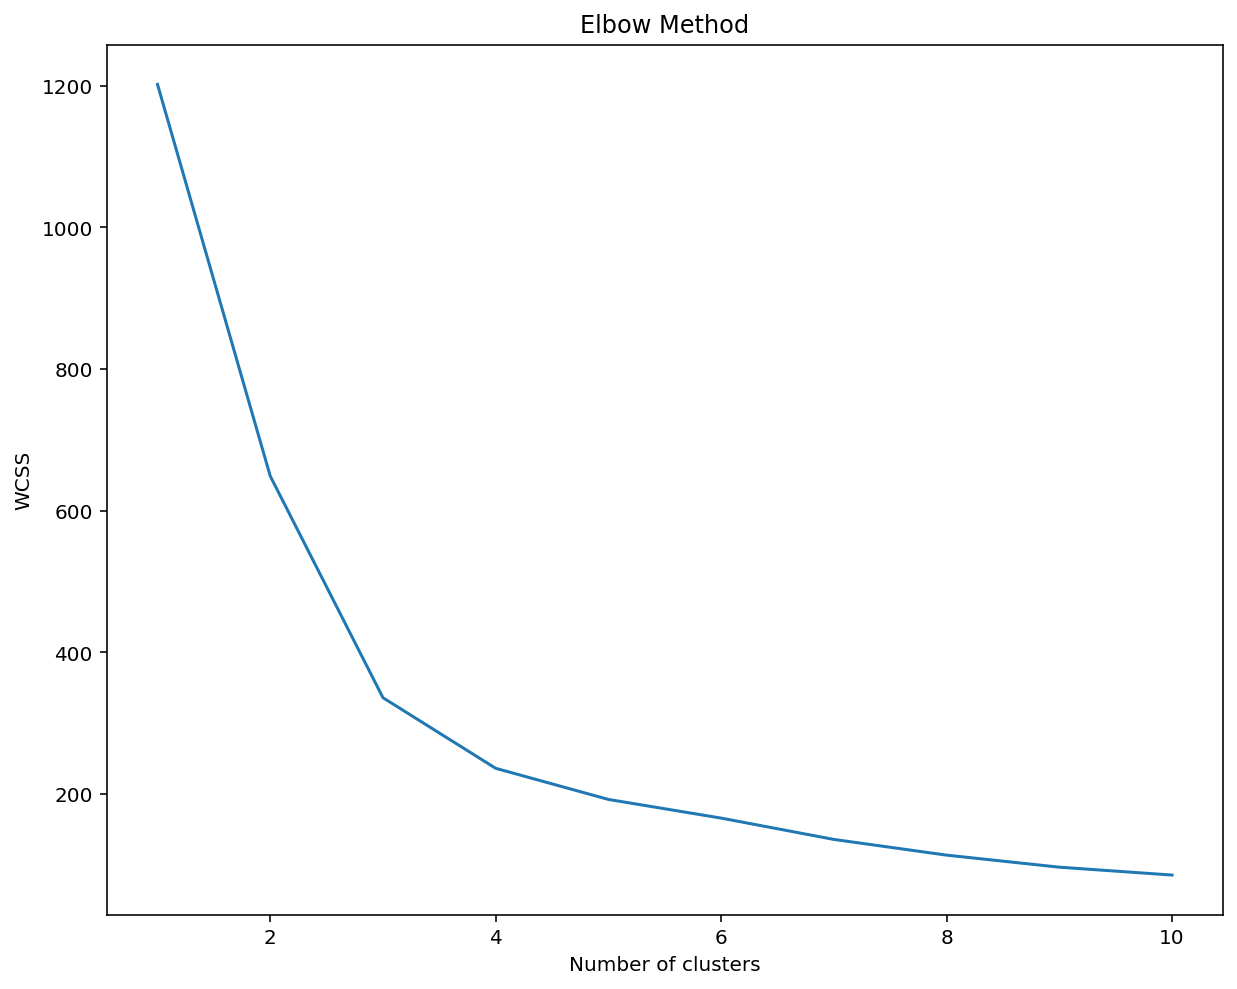

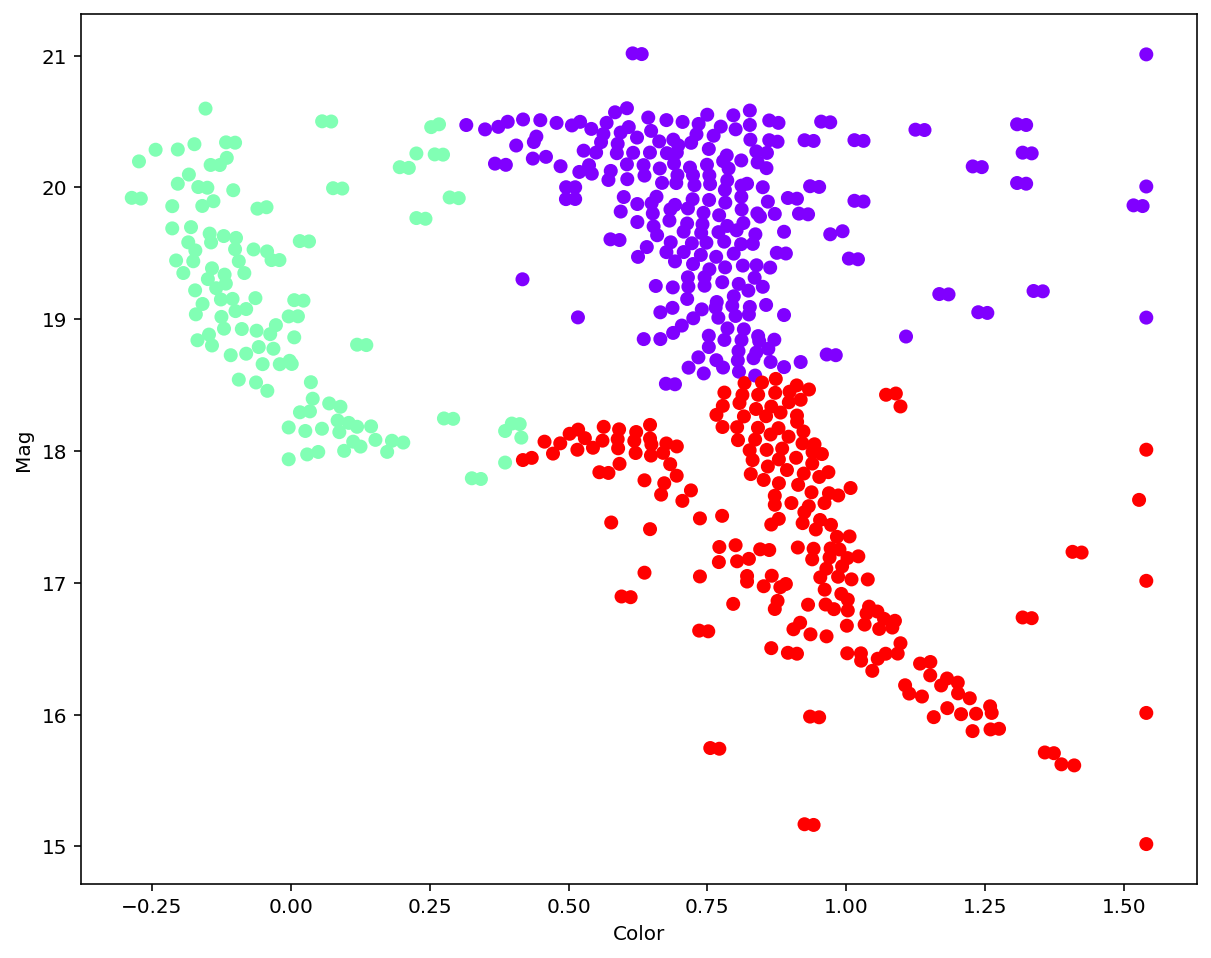

In [13]:
# K-means
#using elbow method to find optimum number of clusters
from sklearn.cluster import KMeans
X = pd.read_csv('../data/colormag.csv', names=['color', 'mag'])
z = StandardScaler()
Xt = z.fit_transform(X)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Xt)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#fit kmeans to Xt with 3 neighbors
kmeans = KMeans(n_clusters=3)
kmeans.fit(Xt)
labels = kmeans.predict(Xt)
#invert the scaling
Xt = z.inverse_transform(Xt)
#plot the data
plt.scatter(Xt[:,0], Xt[:,1], c=labels, cmap='rainbow')
plt.xlabel('Color')
plt.ylabel('Mag')
plt.show()

## Anomaly Detection

ML algorithms suffer in terms of their performance when outliers are not taken care of. 

Bad ideas include 
- dropping them from your sample
- leaving them in, using ML methods, and then ignoring the impact of the outliers


Imagine if a bank did either of these for fradulent credit card transactions...

One efficient way of performing outlier detection in high-dimensional datasets is to use random forests

Isolation forests ‘isolate’ observations by constructing decesion trees:
- randomly selecting a feature and then 
- randomly selecting a split value between the maximum and minimum values of the selected feature

Number of splittings required to isolate a sample = path length from the root node to the terminating node

Path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeable shorter paths for anomalies. 

When a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies - i.e. **linkage-based**

<img src="../figures/IsolationForest1.png">

Random forest are **supervised** so why are they showing up here in **unsupervised learning**?
- there's only two labels (outlier/not outlier)
- but you still have to condition the algorithm on a training set (even if it doesn't have labels) 


## Local Outlier Fraction:

LOF uses density-based outlier detection to identify local outliers
- points that are outliers with respect to their local neighborhood, rather than with respect to the global distribution. 

A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors.
  
The higher the LOF value for an observation, the more anomalous the observation.

Useful because can identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) even if that whole region is an outlying region in the global space of data points.
    - Application SNIa have subclasses that are odd, and even amongst those sub-classes there are real oddballs - these are good to identify because they tell us the most about the physics of the explosion.


<img src="../figures/LOF.png">

## Summary of methods

|Method          |Accuracy|Interpretability|Simplicity|Speed|
|----------------|--------|----------------|----------|-----|
|K-nearest Neighbor| H | H | H | M |
|Kernel Density Estimation| H | H | H | H |
|Hierarchical Clustering| H | L | L | L |
||||||
|K-Means| L | M | H | M |
|Max-radius minimization| L | M | M | M |
|Mean shift| M | H | H | M |
|Gaussian Mixture Models| H | M | M | M |
|Extreme Deconvolution| H | H | M | M |

## Unsupervised ML "wisdom"


* Do you have labels that you trust?
    - Why are you using unsupervised methods at all then
* Do you have an a priori reason for there to be $k$ separate groups?
    - k-Means/GMM
* Are your observations really noise and wiping out structure?
    - Extreme deconvolution

* Do you really need clusters or are you trying to get a sense of the underlying density distribution
    - KDEs
* Do you need clustering but your clusters are defined by an overdensity against a background
    - DBSCAN/OPTICS
* Does your sample have some natural hierarchy
    - Hierarchical clustering
    
* Do you care about the stuff that isn't part of some underlying distribution model
    - IsolationForest/LOF

There is no one right answer.

You are looking for structure in your data with unsupervised methods, so the right answer is to **look at your data** - i.e. try a few different things and refine

# In class-exercise

Train an isolation forest and LOF on a random subset of the color-mag data. 

(For isolation forest, you can use `sklearn.model_selection.train_test_split` to split it into a training set and test set)

and as before train the algoritin 

```
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
```

or with `sklearn.neighbors.LocalOutlierFactor`

```
clf = LocalOutlierFactor(n_neighbors=2)
clf.fit_predict(X)
```

In [14]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [15]:
X = pd.read_csv('../data/colormag.csv', names=['color', 'mag'])
z = StandardScaler()
Xt = z.fit_transform(X)

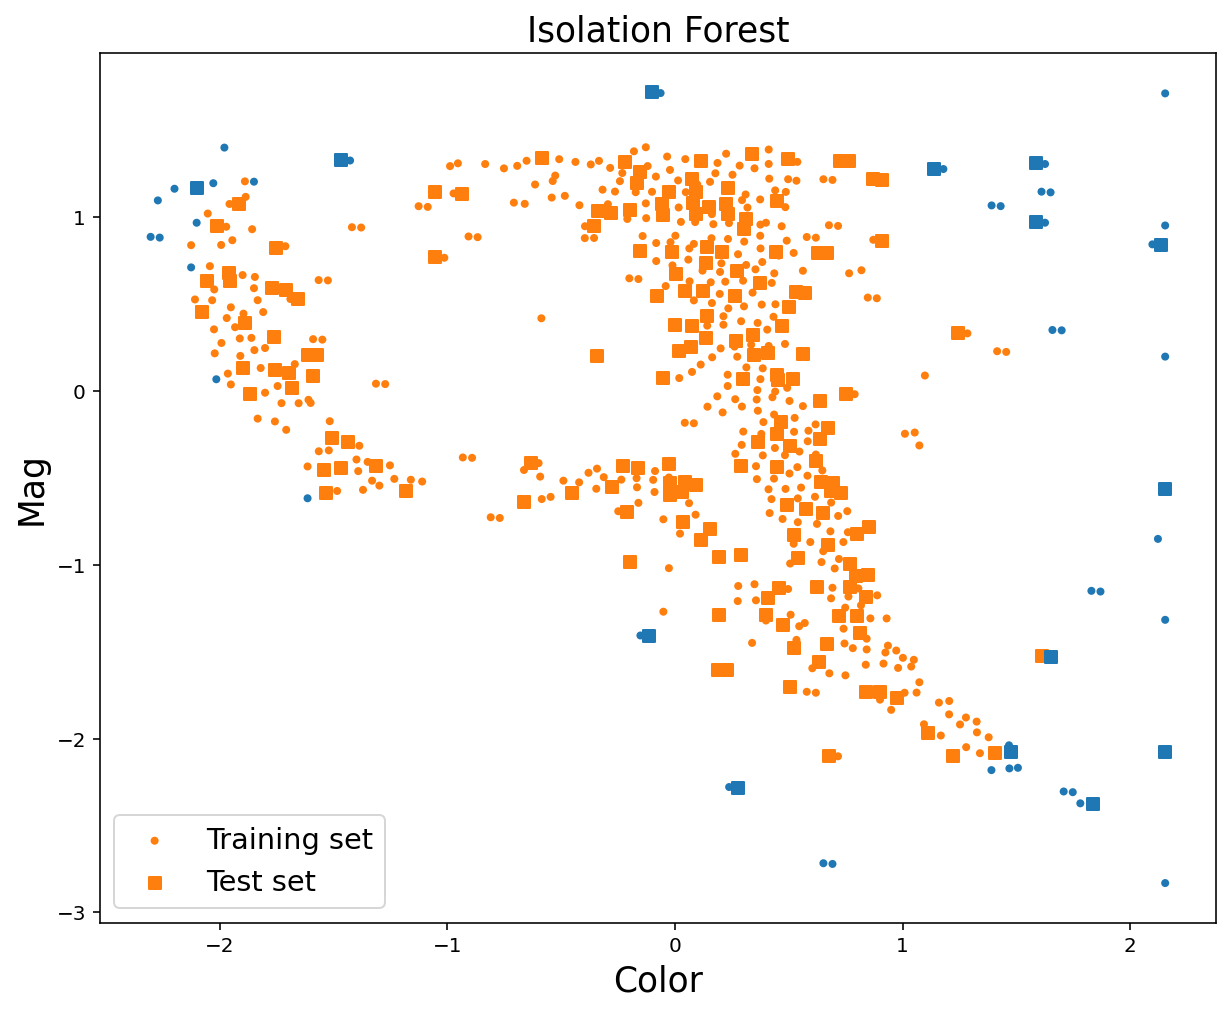

In [16]:
Xtrain, Xtest = train_test_split(Xt, test_size=0.3)
## YOUR CODE HERE
clf = IsolationForest(n_estimators=100, contamination=0.1)
clf.fit(Xtrain)

#clf = IsolationForest(...
#clf.fit(Xtrain)

y_pred_train = clf.predict(Xtrain)
y_pred_test = clf.predict(Xtest)

#outliers are -1, inliers are 1
y_pred_train[y_pred_train == -1] += 1
y_pred_test[y_pred_test == -1] += 1

color_train = [f'C{i}' for i in y_pred_train]
plt.scatter(Xtrain[:,0], Xtrain[:,1], color=color_train, marker='.', label='Training set')
color_test = [f'C{i}' for i in y_pred_test]
plt.scatter(Xtest[:,0], Xtest[:,1], color=color_test, marker='s', label='Test set')

ax = plt.gca()
ax.legend(fontsize='x-large', loc='lower left')

ax.set_xlabel('Color', fontsize='xx-large')
ax.set_ylabel('Mag', fontsize='xx-large')
ax.set_title('Isolation Forest', fontsize='xx-large');

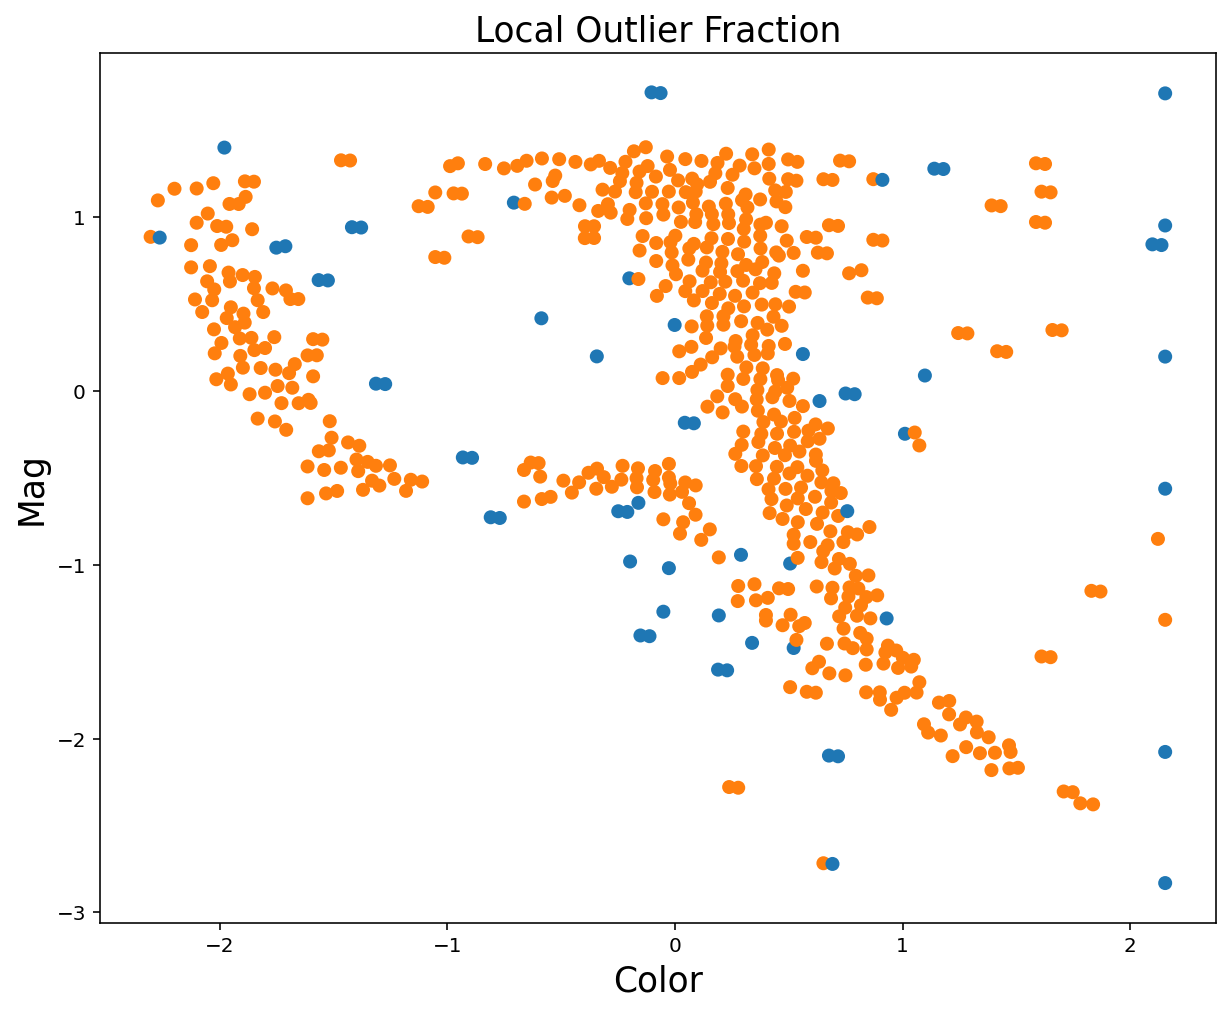

In [17]:
## YOUR CODE HERE
#clf = LocalOutlierFactor(...
#labels = clf.fit_predict(...
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
labels = clf.fit_predict(Xt)

#outliers are -1, inliers are 1
labels[labels == -1] += 1


color = [f'C{i}' for i in labels]
plt.scatter(Xt[:,0], Xt[:,1], color=color, marker='o')

ax = plt.gca()

ax.set_xlabel('Color', fontsize='xx-large')
ax.set_ylabel('Mag', fontsize='xx-large')
ax.set_title('Local Outlier Fraction', fontsize='xx-large');

<img src="../figures/classification_workflow.jpg">

Individual classifiers are often **weak** (prone to bias/overfitting) so we use **ensembles of classifiers**
- bagging (train classifiers in parallel, ensemble votes on output) 
- boosting (train classifiers in series, each one learning from the mistakes of the previous one, last classifier votes)

(e.g. decision tree vs random forest)

#### The stats viewpoint
- Rather than rely solely on the structure in the data as in unsupervised learning, we're introducing extra information (**priors**) to help improve our ability to model unlabelled data (**prediction**) 

## Performance Measures/Scores (often, also called metrics, just to be confusing):


The first question that we need to address is how we score our results - i.e. how good are our predictions

In the simplest case, there are 2 types of errors:
* a [False Positive](https://en.wikipedia.org/wiki/False_positives_and_false_negatives#False_positive_error), where we have assigned a *true* class label when it is really false. 

This is called a "Type-1 error".

* a [False Negative](https://en.wikipedia.org/wiki/False_positives_and_false_negatives#False_positive_error), where we have assigned a *false* class label when it is really true. 

This is called a "Type-II error".

All 4 [possibilities](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) for each pair of classes:
- True Positive = **correctly identified**  (apple identified as apple)
- True Negative = **correctly rejected**  (orange rejected as orange)
- False Positive = **incorrectly identified**  (orange identified as apple)
- False Negative = **incorrectly rejected**  (apple rejected as orange)

In the case where there are only two classes (i.e. binary classification), these are clearly related, but in the multi-class case, these numbers tell you a more complex story:

## The Confusion Matrix

Summarizes the "confusion" for the classifier. 

- For a perfect classifier all of the power will be along the diagonal, while confusion is represented by off-diagonal signal. 

Like almost everything else we have encountered during this exercise, `scikit-learn` makes it easy to compute a confusion matrix. This can be accomplished with the following: 

```
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
```


Here's an example from the <a href="https://www.kaggle.com/c/PLAsTiCC-2018">Photometric LSST Astronomical Time-Series Classificiation Challenge (PLaSTiCC)</a> from the winning entry by then grad student, Kyle Boone:
<img src="../figures/KyleBoone_CM.png" width="70%">


You can read about Kyle's winning entry here: https://arxiv.org/abs/1907.04690 (note that you've seen many of the classes in this CM during this semester, either on homework or in-class exercises)

Based on TP/FP/TN/FN, we usually define either of the following pairs of terms:  

>$ {\rm completeness} = \frac{\rm true\ positives}{\rm true\ positives + false\ negatives}$

>$  {\rm contamination} = \frac{\rm false\ positives}{\rm true\ positives + false\ positives} = {\rm false\ discovery\ rate}$

or

> $ {\rm true\ positive\ rate} = \frac{\rm true\ positives} {\rm true\ positives + false\ negatives}
$

> $  {\rm false\ positive\ rate} = \frac{\rm false\ positives} {\rm true\ negatives + false\ positives} = {\rm Type1\ error}
$

where **completeness** = **true positive rate** and this is also called **sensitivity** or **recall**


Which set is used is largely arbitrary and dependent on field/sub-field, but they're largely giving you similar information

Similarly 
 
>$ {\rm efficiency} = 1 - {\rm contamination} = {\rm precision}. $

Scikit-Learn also reports the **F1 score** which is the harmonic mean (i.e. reciprocal of arithmetic mean of reciprocals) of precision and sensitivity (efficiency and completeness).

Depending on your goals, you may want to maximize the completeness or the efficiency, or a combination of both.

## Classifier performance can also be viewed as a tradeoff 

You might want to minimize voter fraud (contamination), but if doing so reduced voter participation (completeness) by a larger amount, then that wouldn't be such a good thing.  

So you need to decide what balance you want to strike.

**Note that this tradeoff is different from the bias/variance tradeoff.** 
You can still infer bias results from a sample without much contamination!

If your labels were positives = detected, and negatives = below detection threshold, you can make the analogy to HW8, where you looked at completeness and efficiency for a simulated survey - what fraction of sources you recovered, and how efficient you were at discriminating sources from background noise excursion. 

You had a hard cut in number of counts (a threshold) so you had a sample that was not contaminated, but if you only used the detected objects for inference you'd still get a biased value for population parameters (exponent of the power law)

## Comparing the performance of classifiers

So, "best" performance is a bit of a subjective topic. 
- We trade contamination as a function of completeness and this is science dependent.

This is true even for just a single classifier, if we get a score (or probability) for an object being a certain class. Then we don't have a sharp decision boundary but rather a threshold that we can vary.

This choice of threshold impacts the TPR/FPR so we want to characterize how it impacts classification. The way that we will do this is with a [**Receiver Operating Characteristic (ROC)**](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve.  

A ROC curve simply plots the true-positive vs. the false-positive rate as a function of threshold.

## ROC curves 

<table>
    <tr>
        <td width="500px">
            <img src="../figures/roc_schematic.jpg">
        </td>
        <td width="500px">
            <img src="../figures/roc_plasticc.jpg">
        </td>
     </tr>
</table>

Annoyingly, they're only well defined for binary classification, so if you have a multi-class problem, then you have to:

- plot 1 ROC curve per class
- **micro-averaging**: Reduce multi-class problem to correctly classififed/not-correctly classified regardless of class
- **macro-averaging**: plot average ROC curve across all classes (what's on the right)

## AUC

Generally speaking, you want to chose a classifier that maximizes the **area under the curve.**
- very literally the area under the ROC curve
- classifiers with a higher AUC are better (more true positives, less false positives)

## Precision-Recall curves

You can also plot completeness/contamination or precision/recall.

One concern about precision-recall curves is that they are sensitive to the relative sample sizes.
- If there are many more background events than source events small false positive results can dominate a signal. 
- For these cases we can plot efficiency (1 - contamination) vs. completeness.

<img src="../figures/PRC_turbo_3_downsampled_thresh_lines.png">

## Actually computing performance scores:

- [sklearn.metrics.roc_curve(y_test, y_prob)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [sklearn.metrics.precision_recall_curve(y_test, y_prob)](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)
- astroML.utils.completeness_contamination(y_pred, y_test)

**Note** 
- [`sklearn.metrics` algorithms](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) take `y_test`, which are classes, and `y_prob`, which are not class predictions, but rather probabilities
- the AstroML algorithm wants `y_pred` (which we get by converting `y_prob` into discrete predictions as a function of the probability).


## Different Supervised Learning methods:


With Unsupervised Learning, there were a few different approaches-
- centroid-based (k-means/median)
- distribution-based (GMMs/Extreme Deconvolution)
- linkage/connectivity-based (hierarchical clustering/isolation forests)
- density-based (KDEs/DBSCAN/Optics)

We can divide these methods into two groups-

## Generative vs. Discriminative Classification

As an example, if you are trying to determine whether a galaxy is at redshift 0.2 or redshift 2, you could either 
- learn how galaxies are distributed over all redshifts and given this model, you can evaluate the likelihood ratio of the data at both redshifts
- OR, you can learn what key features discriminate between galaxies at z=0.2 and z=2

For example, in the figure below, to classify a new object with $x=1$, it would suffice to know that either 
1) model 1 is a better fit than model 2
or 
2) $x=1.4$ is a good discriminator between the two populations 

![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_bayes_DB_1.png)

If we find ourselves asking which category is most likely to generate the observed result, then we are using using **density estimation** for classification 
- this is referred to as **generative classification**.  
- we have a full model of the density for each class or we have a model which describes how data could be generated from each class
- both distribution-based (where you assume a form the density) and density-based (where you directly estimate the density from the data) approaches are here

If we don't care about the full distribution, then we are doing something more like clustering
- we don't need to map the distribution, we just need to define boundaries.  
- Classification that finds the **decision boundary** that separates classes is called **discriminative classification**
- centroid-based and linkage-based methods come under this class
- For high-dimensional data, this may be a better choice
    - usual reason - curse of dimensionality
    
You've already seen **decision trees** and **random forests** as examples of discriminative classification

![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_bayes_DB_1.png)

In reality, we usually do both. 

We first do discriminative classification using a decision boundary based-method, and then we do generative classification using density estimation for the class of interest (in order to determine a probability of group membership).

## Generative Classification

We can use Bayes' theorem to relate the labels to the features in an $N\times D$ data set $X$.  

The $j$th feature of the $i$th sample is $x_{ij}$ and there are $k$ classes giving discrete labels $y_k$.  
Then we have:

$$p(y_k|x_i) = \frac{p(x_i|y_k)p(y_k)}{\sum_i p(x_i|y_k)p(y_k)}$$

where $x_i$ is a vector with $j$ components.

$p(y=y_k)$ is the probability of any point having class $k$ (equivalent to the prior probability of the class $k$). 

In generative classifiers we model class-conditional densities $p_k(x) = p(x|y=y_k)$ and our goal is to estimate the $p_k$'s. 

Before we get into the generative classification algortithms, we'll first discuss 3 general concepts:
- Discriminant Functions
- Bayes Classifiers
- Decision Boundaries

### The Discriminant Function

We can relate classification to density estimation and regression.

$\hat{y} = f(y|x)$ represents the best guess of $y$ given $x$. 

Classification can be thought of as the analog of regression where $y$ is a discrete *category* rather than a continuous variable, for example $y=\{0,1\}$.

(Alternately regression is just classification with very many classes distrbuted on a real number line).

In classification we refer to $f(y|x)$ as the [**discriminant function**](https://en.wikipedia.org/wiki/Discriminant_function_analysis).

For a simple 2-class example, if you want the best guess of the label y:

$$\begin{eqnarray}
g(x) = f(y|x) & = &  \int y \, p(y|x) \, dy \\
%    & = & \int y p(y|x) \, dy \\
       & = & 1 \cdot p(y=1 | x) + 0 \cdot p(y=0 | x) = p(y=1 | x).
%     & = & p(y=1 | x)
\end{eqnarray}
$$

From Bayes rule (yet again):

$$g(x) = \frac{p(x|y=1) \, p(y=1)}{p(x|y=1) \, p(y=1)  + p(x|y=0) \, p(y=0)}$$

### Bayes Classifier

If the discriminant function gives a binary prediction, we call it a **Bayes classifier**, formulated as


$$\begin{eqnarray} \widehat{y} & = & \left\{ \begin{array}{cl}       	           1 & \mbox{if $g(x) > 1/2$}, \\       	           0 & \mbox{otherwise,}       	           \end{array}     	   \right. \\     & = & \left\{
\begin{array}{cl}               1 & \mbox{if $p(y=1|x) > p(y=0|x)$}, \\               0 & \mbox{otherwise.}               \end{array}       \right.\end{eqnarray}$$

**i.e. the best guess class is the most likely** (duh)

This can be generalized to any number of classes, $k$, and not just two.

### Decision Boundary

The **decision boundary** is just the set of $x$ values at which each class is equally likely:

$$
p(x|y=1)p(y=1)  =  p(x|y=0)p(y=0);
$$

$$g_1(x) = g_2(x) \; {\rm or}\; g(x) = 1/2$$

So same figure as earlier - we're just assigning classifications according to which pdf is higher at every given $x$.

![Ivezic, Figure 9.1](http://www.astroml.org/_images/fig_bayes_DB_1.png)


## Simplest Classifier: Naive Bayes

In practice classification can be very complicated as the data are generally multi-dimensional (that is we don't just have $x$, we have $x_{j=0},x_1,x_2,x_3...x_n$, so we want $p(x_0,x_1,x_2,x_3...x_n|y)$.

However, if we **assume** that all attributes are conditionally independent (which is not always true, but is often close enough), then this simplifies to

$$ p(x_1,x_2|y_k) = p(x_1|y)p(x_2|y_k)$$
  
which can be written as

$$ p({x_{j=0},x_1,x_2,\ldots,x_N}|y_k) = \prod_j p(x_j|y_k).$$

From Bayes' rule and conditional independence we get

$$
  p(y_k | {x_0,x_1,\ldots,x_N}) =
  \frac{\prod_j p(x_j|y_k) p(y_k)}
       {\sum_l \prod_j p(x_j|y_l) p(y_l)}.
$$


We calculate the most likely value of $y$ by maximizing over $y_k$:

$$
\hat{y} = \arg \max_{y_k} \frac{\prod_j p(x_j|y_k) p(y_k)}
        {\sum_l \prod_j p(x_j|y_l) p(y_l)},
$$



From there the process is just estimating densities: $p(x|y=y_k)$ and $p(y=y_k)$ are learned from a set of training data, where
- $p(y=y_k)$ is just the frequency of the class $k$ in the training set
- $p(x|y=y_k)$ is just the density (probability) of an object with class $k$ having the attributes $x$


## Gaussian Naive Bayes


Of course, to get $p(x|y=y_k)$ you can use all of the density estimation methods from last week. 

The parametric model is to assert that we have a bunch of 1-D Gaussians i.e. $p(x_i|y=y_k)$ is a normal distributions, with means $\mu_{ik}$ and widths $\sigma_{ik}$. 

The naive Bayes estimator is then

$$\hat{y} = \arg\max_{y_k}\left[\ln p(y=y_k) - \frac{1}{2}\sum_{i=1}^N\left(2\pi(\sigma_{ik})^2 + \frac{(x_i - \mu_{ik})^2}{(\sigma_{ik})^2} \right) \right]$$

The "naive" refers to the fact that we are assuming that all of the variable are independent. You can of course compute the covariance matrix to estimate the degree to which this is bullshit.

But then you can use dimensionality reduction like PCA to help "whiten" the features and construct independent variables.

Generally, naieve Bayes by itself is a bad idea because of the covariances, but PCA might also be a bad idea because it's a linear transformation and the covariance may not be linear.

If instead, we relax that assumption and allow for covariances then:

## Linear Discriminant Analysis

In [Linear Discriminant Analysis (LDA)](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) we assume that the class distributions have identical covariances for all $k$ classes (all classes are a set of shifted Gaussians). 

The class-dependent covariances that would normally give rise to a quadratic dependence on
$X$ cancel out if they are assumed to be constant. 

The Bayes classifier is, therefore, linear with respect to $X$, and  discriminant boundary between classes is the line that minimizes the overlap between Gaussians.

Basically, we're projecting N-dimensional data onto k new axes and finding what the optimal decision boundary is for each. Therefore LDA is also used for dimensionality reduction, but the new features may still be correlated.

<img src="../figures/lda.png">

Relaxing the requirement that the covariances of the Gaussians are constant, the discriminant function becomes quadratic in $X$.

This is sometimes known as [Quadratic Discriminant Analysis (QDA)](https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis).

[`LDA`](http://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html) and [`QDA`](http://scikit-learn.org/0.16/modules/generated/sklearn.qda.QDA.html#sklearn.qda.QDA) are implemented in Scikit-Learn as follows and an example using the same data as above is given below.

<img src="../figures/lda_vs_qda.png">

## K-Nearest Neighbor Classifier

These approaches are using a model for the population density. We can, just as in unsupervised learning, use linkage instead (or local density):

[$k$-nearest-neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) ($k$NN) is simple and can be used for clasification and regression. 

The output is determined by examining the $k$ nearest neighbors in the training set, where $k$ is a user defined number. 

Typically, though not always, distances between sources are Euclidean, and the final classification is assigned to whichever class has a plurality within the $k$ nearest neighbors (in the case of regression, the average of the $k$ neighbors is the output from the model). 

The number of neighbors, $k$, regulates the complexity of the classification, where a larger $K$ decreases the variance in the classification but leads to an increase in the bias.  

The distance measure is usually N-D Euclidean.  However, if the attributes have very different properties, then normalization, weighting, etc. may be needed.

<img src="../figures/knn.png">

# In-class exercise: Putting together the full supervised-learning workflow

Data comes from [this paper.](https://ui.adsabs.harvard.edu/abs/2010ApJS..186..427N/abstract) where Preethi Nair (LSU) heroically visually classified 14,000 galaxies.

Her T-Type morphology is much more fine-grained but it can be mapped to broad galaxy morphology.

T-Type:
- Ellipticals: -6 to -4  
- Spirals: -3 to 7  
- Irregular things: 7 and up

So the morphology column in the file is just a letter: 
- Spiral: S 
- Elliptical: E 
- Other: N

And that in turn, can be binarized as Ellipticals =1, Not Ellipticals = 0



## 1. Clean the Data:

Only learn on well defined morphologies, aka elliptical or spirals.


In [18]:
import matplotlib.pyplot as plt
import astropy.table as at
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_confusion_matrix

In [19]:
data = at.Table.read('../data/SDSS_morphology.fit')
data.convert_bytestring_to_unicode()
data

SDSS,zs,g_mag,r_mag,Rp,log_M_,Age,SFRT,SFRM,mug,M_L,b_a,sigma,e_sigma,TT,RA,DEC,Morphology,Morphology_i
,,mag,mag,kpc,[solMass],Gyr,solMass / yr,1 / yr,mag / arcsec2,Sun,,km / s,km / s,,deg,deg,,
str20,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,str1,int64
J155341.74-003422.84,0.078,15.82,15.058,18.669,11.083,4.459,1.014,-9.958,22.631,0.194,0.794,143.68,7.89,3,238.42392,-0.573011,S,0
J155146.83-000618.62,0.055,15.512,14.606,12.185,11.245,7.111,0.896,-10.94,22.439,0.329,0.954,204.81,5.36,-5,237.94511,-0.105172,E,1
J154453.22+002415.48,0.034,15.631,14.838,6.12,10.405,4.287,-0.012,-10.835,22.47,0.094,0.848,129.97,5.46,-2,236.22176,0.4043,S,0
J154711.32+002424.81,0.033,15.716,15.158,11.094,10.156,1.901,1.109,-9.926,22.631,0.045,0.854,45.25,12.27,4,236.79716,0.406892,S,0
J154514.39+004619.89,0.013,15.341,14.956,6.917,9.173,1.891,-1.738,-10.288,22.533,-0.077,0.329,89.32,14.59,5,236.30997,0.772192,S,0
J155255.43+004304.87,0.033,15.86,15.084,3.46,10.484,6.842,0.437,-11.138,22.129,0.265,0.76,188.82,5.21,-5,238.23096,0.718019,E,1
J155357.40+004117.11,0.039,15.784,15.147,6.882,10.627,2.004,0.461,-9.978,22.174,0.273,0.486,102.61,7.84,1,238.48917,0.688086,S,0
J110122.00-010824.89,0.074,15.588,14.628,17.776,11.442,7.491,0.176,-11.327,22.463,0.28,0.755,285.78,6.63,-5,165.34167,-1.140247,E,1


In [20]:
data_cleaned = data[data['Morphology'] != 'N']
import numpy as np
import pandas as pd
df = pd.DataFrame(np.array(data_cleaned))

In [21]:
feature_names = ['zs', 'g_mag', 'r_mag', 'sigma', 'M_L', 'SFRT', 'b_a', 'log_M_']
X = df[feature_names]
y = df['Morphology']

In [22]:
#encode labels - or we could just morphology_i
enc = LabelEncoder()
y = enc.fit_transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Accuracy of KNN classifier on training set: 0.93
Accuracy of KNN classifier on test set: 0.87
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.89
Accuracy of LDA classifier on training set: 0.88
Accuracy of LDA classifier on test set: 0.88
Accuracy of KNN classifier on training set w/ 30 neighbors: 0.89
Accuracy of KNN classifier on test set w/ 30 neighbors: 0.89


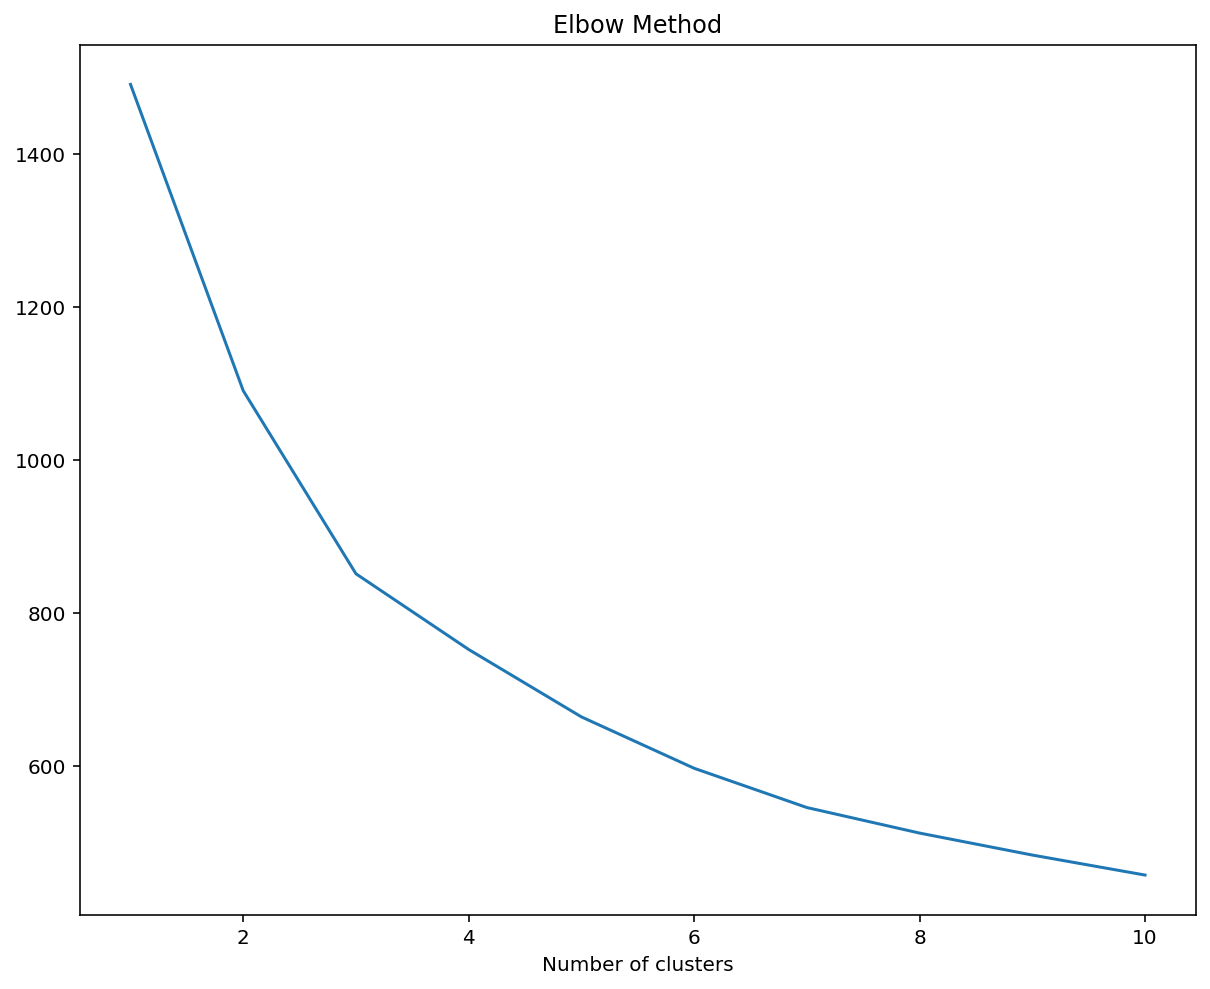

In [24]:

## YOUR CODE HERE

#knn = kNN(...
#knn.fit(...
#using the elbow method determine the best number of neighbors
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')

knn = kNN(n_neighbors=3)
knn.fit(X_train, y_train)


print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

## YOUR CODE HERE
#rf = RandomForestClassifier(...
#rf.fit(....
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

## YOUR CODE HERE
#lda = LDA(...
#lda.fit(...
lda = LDA(n_components=1)
lda.fit(X_train, y_train)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

## YOUR CODE HERE
#knn2 = kNN(...
#knn2.fit(...
knn2 = kNN(n_neighbors=30)
knn2.fit(X_train, y_train)

print('Accuracy of KNN classifier on training set w/ 30 neighbors: {:.2f}'
     .format(knn2.score(X_train, y_train)))
print('Accuracy of KNN classifier on test set w/ 30 neighbors: {:.2f}'
     .format(knn2.score(X_test, y_test)))



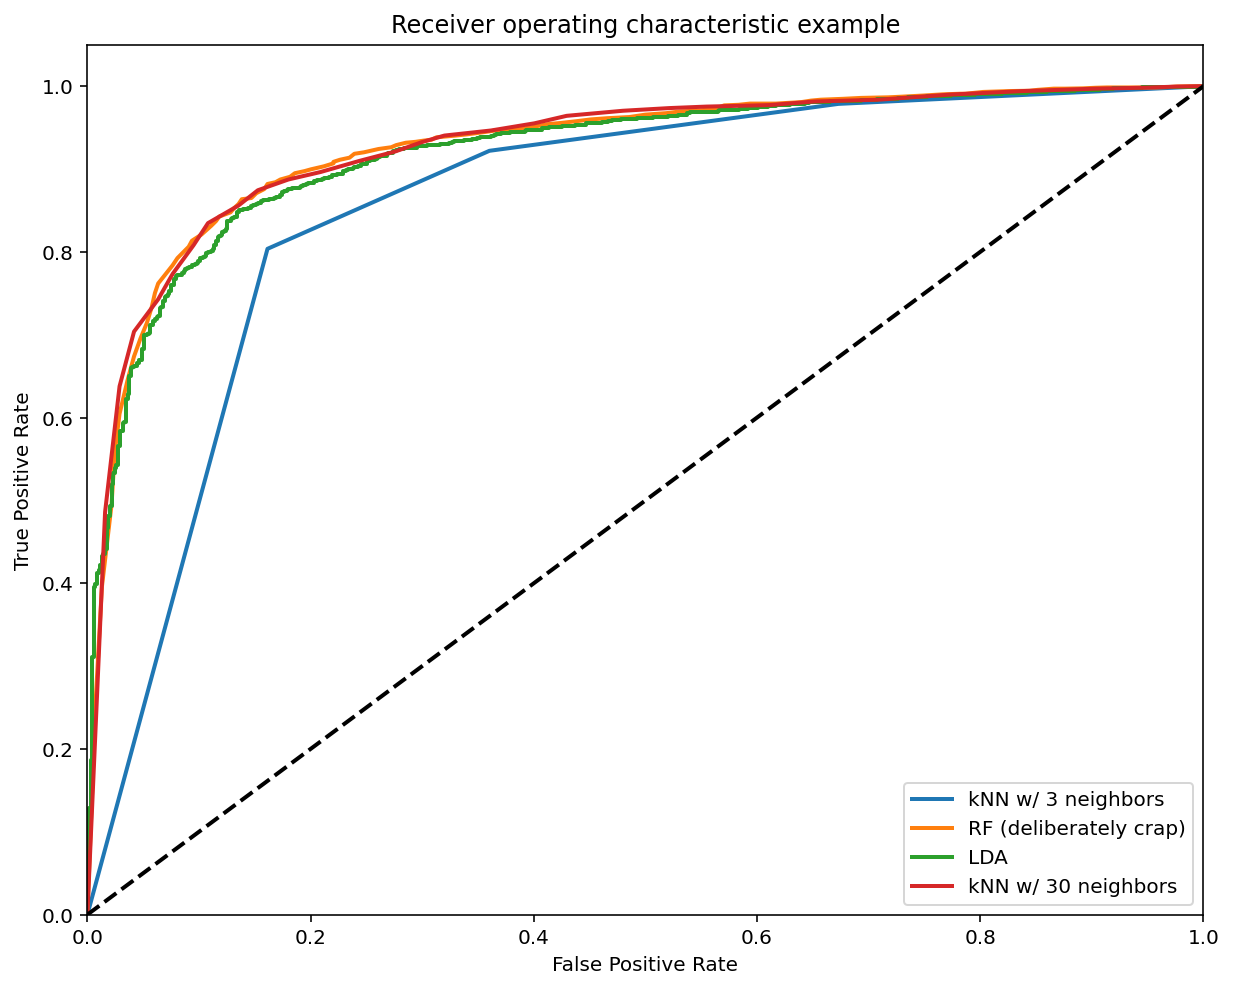

In [25]:
y_score_knn = knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)

y_score_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)

y_score_lda = lda.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_score_lda)

y_score_knn2 = knn2.predict_proba(X_test)[:,1]
fpr_knn2, tpr_knn2, _ = roc_curve(y_test, y_score_knn2)

plt.figure()
lw = 2
plt.plot(fpr_knn, tpr_knn, color='C0', lw=lw, label='kNN w/ 3 neighbors')
plt.plot(fpr_rf, tpr_rf, color='C1', lw=lw, label='RF (deliberately crap)')
plt.plot(fpr_lda, tpr_lda, color='C2', lw=lw, label='LDA')
plt.plot(fpr_knn2, tpr_knn2, color='C3', lw=lw, label='kNN w/ 30 neighbors')

plt.plot([0, 1], [0, 1], color='k', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

/home/physical256/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/physical256/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/physical256/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2.

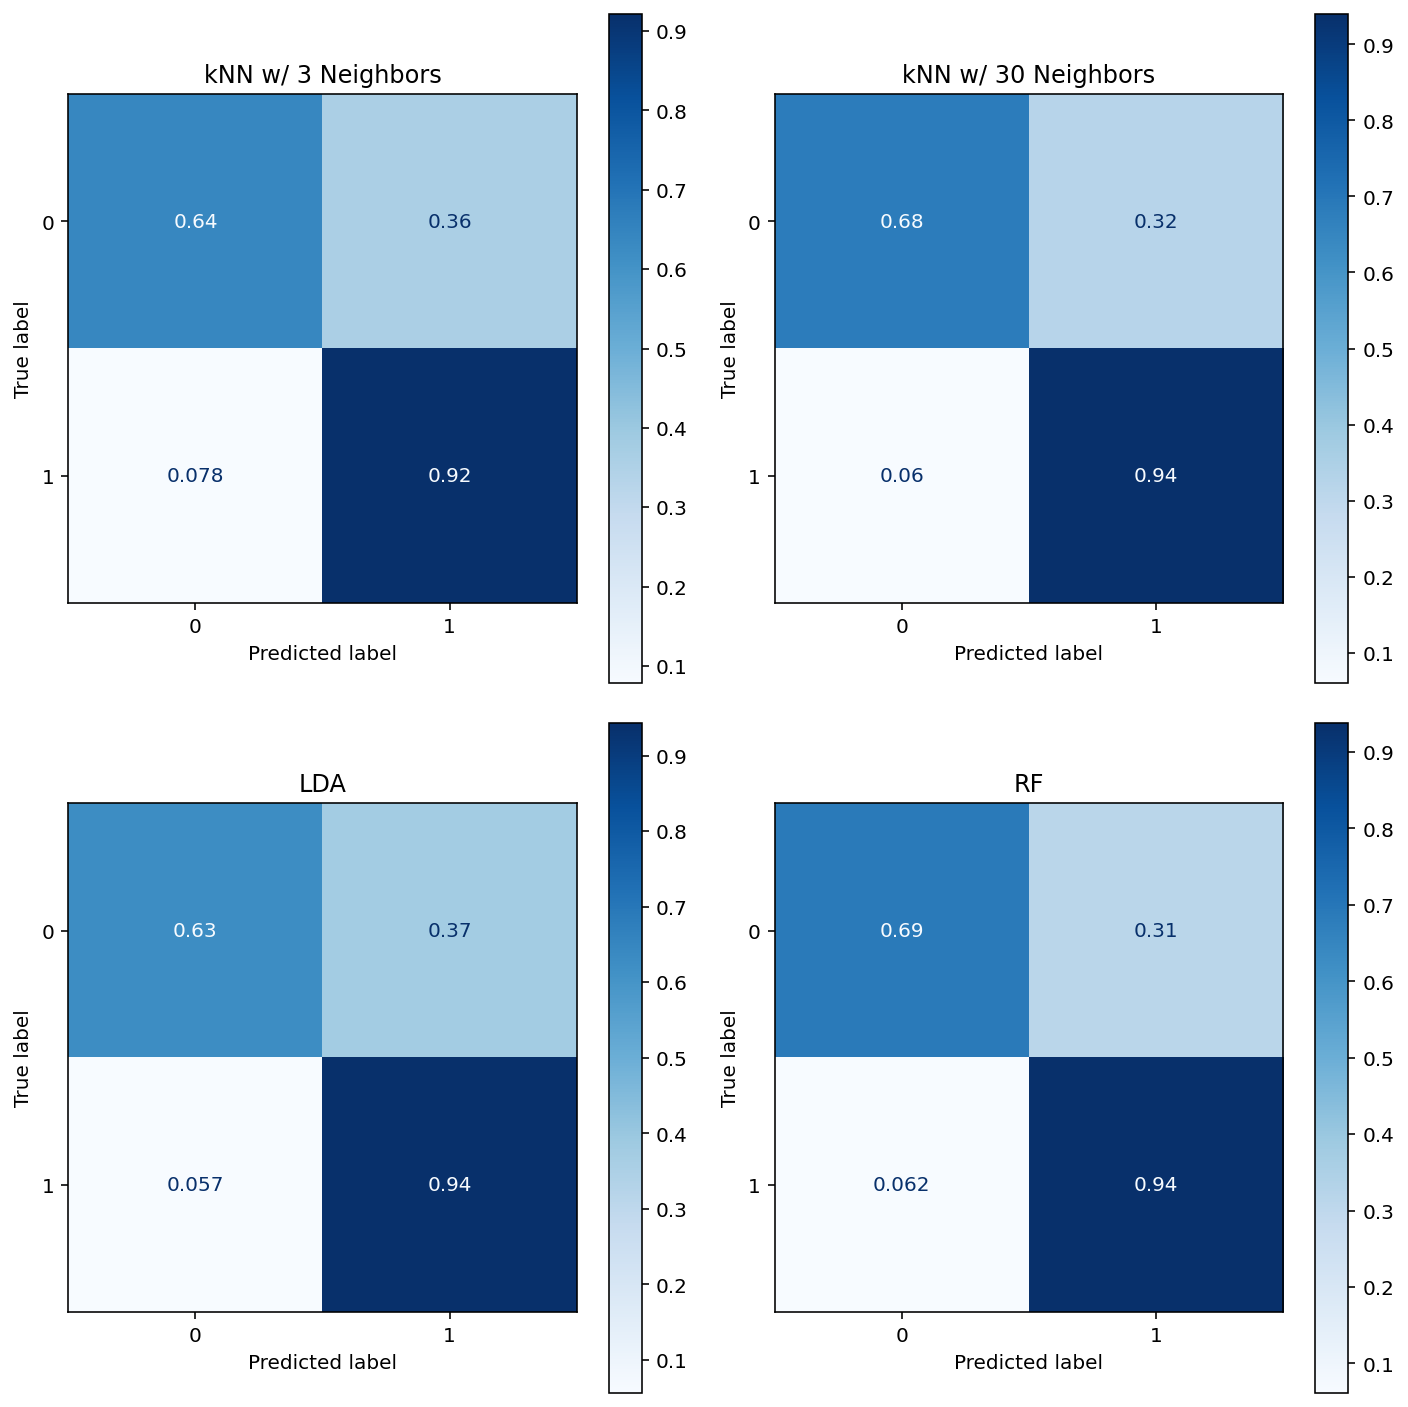

In [26]:
fig, axs = plt.subplots(figsize=(10, 10), nrows=2, ncols=2)

plot_confusion_matrix(knn, X_test, y_test, normalize='true', cmap='Blues', ax=axs[0][0])
ax = axs[0][0]
ax.set_title('kNN w/ 3 Neighbors')

plot_confusion_matrix(knn2, X_test, y_test, normalize='true', cmap='Blues', ax=axs[0][1])
ax = axs[0][1]
ax.set_title('kNN w/ 30 Neighbors')

plot_confusion_matrix(lda, X_test, y_test, normalize='true', cmap='Blues', ax=axs[1][0])
ax = axs[1][0]
ax.set_title('LDA')

plot_confusion_matrix(rf, X_test, y_test, normalize='true', cmap='Blues', ax=axs[1][1])
ax = axs[1][1]
ax.set_title('RF');

fig.tight_layout()

In [27]:
print('kNN w/ 3 neighbors\n', classification_report(y_test, knn.predict(X_test)))

print('kNN w/ 30 neighbors\n', classification_report(y_test, knn2.predict(X_test)))

print('LDA', classification_report(y_test, lda.predict(X_test)))

print('Deliberately Crap RF', classification_report(y_test, rf.predict(X_test)))

kNN w/ 3 neighbors
               precision    recall  f1-score   support

           0       0.67      0.64      0.66       694
           1       0.91      0.92      0.92      2772

    accuracy                           0.87      3466
   macro avg       0.79      0.78      0.79      3466
weighted avg       0.86      0.87      0.86      3466

kNN w/ 30 neighbors
               precision    recall  f1-score   support

           0       0.74      0.68      0.71       694
           1       0.92      0.94      0.93      2772

    accuracy                           0.89      3466
   macro avg       0.83      0.81      0.82      3466
weighted avg       0.89      0.89      0.89      3466

LDA               precision    recall  f1-score   support

           0       0.73      0.63      0.68       694
           1       0.91      0.94      0.93      2772

    accuracy                           0.88      3466
   macro avg       0.82      0.79      0.80      3466
weighted avg       0.87      

# Appendix: Extreme Deconvolution

Real data come with uncertainties

Extreme Deconvolution is parametric density estimation on a *noisy* d-dimensional dataset
- Straightforward generalization of Gaussian Mixture Models conceptually but much slower
    

You have some real obsevations $\mathbf{x}_i$ in d-dimensions *with zero-mean Gaussian noise* $\epsilon_i$ with known per-datapoint covariance $S_i$ to a projection $R_i$ of a true value $\mathbf{v}_i$


## $$
\mathbf{x}_{i}=R_{i} \mathbf{v}_{i}+\epsilon_{i}, \quad \epsilon_{i} \sim \mathcal{N}\left(\mathbf{0}, S_{i}\right)
$$

We assume that $\mathbf{v}_i$ can be modelled by a mixture of Gaussians with K components (i.e. a GMM):

## $$
p\left(\mathbf{v}_{i} | \theta\right)=\sum_{j}^{K} \alpha_{j} \mathcal{N}\left(\mathbf{v} | \mathbf{\mu}_{j}, \Sigma_{j}\right)$$

with the components mean the mean, covariance and mixture coefficients of each Gaussian being the parameters that we solve for as before:

## $$\theta=\left\{\alpha_{j}, \mathbf{\mu}_{j}, \Sigma_{j}\right\}_{j=1}^{K}
$$


Just as before the likelihood is easy:
## $$
\mathcal{L}(\theta)=\sum_{i}^{N} \log \sum_{j}^{K} \alpha_{j} \mathcal{N}\left(\mathbf{x}_{i} | R_{i} \mathbf{\mu}_{j}, C_{i j}\right)$$

#### BUT NOW THE COVARIANCE MATRIX INCLUDES THE ERRORS IN THE OBSERVATIONS

## $$ C_{i j}=R_{i} \Sigma_{j} R_{i}^{T}+S_{i}
$$

Now instead of estimating the covariance of just the $k$ GMM components, you now have the the $n \times n$ covariance matrix of the observations.

This is unfortunate because the covariance matrix appears as the inverse in the likelihood.

In [28]:
from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.density_estimation import XDGMM
from astroML.crossmatch import crossmatch
from astroML.datasets import fetch_sdss_S82standards, fetch_imaging_sample
from astroML.plotting.tools import draw_ellipse
from astroML.utils.decorators import pickle_results
from astroML.stats import sigmaG

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [29]:
#------------------------------------------------------------
# define u-g-r-i-z extinction from Berry et al, arXiv 1111.4985
# multiply extinction by A_r
extinction_vector = np.array([1.810, 1.400, 1.0, 0.759, 0.561])

#----------------------------------------------------------------------
# Fetch and process the noisy imaging data
data_noisy = fetch_imaging_sample()

# select only stars
data_noisy = data_noisy[np.where(data_noisy['type'] == 6)[0]]

# Get the extinction-corrected magnitudes for each band
X = np.vstack([data_noisy[f + 'RawPSF'] for f in 'ugriz'])
Xerr = np.vstack([data_noisy[f + 'psfErr'] for f in 'ugriz'])

# extinction terms from Berry et al, arXiv 1111.4985
X -= (extinction_vector * data_noisy['rExtSFD'][:, None]).flatten().T

X = X.T
Xerr = Xerr.T

ValueError: operands could not be broadcast together with shapes (5,82003) (410015,) (5,82003) 

In [ ]:
#----------------------------------------------------------------------
# Fetch and process the stacked imaging data
data_stacked = fetch_sdss_S82standards()

# cut to RA, DEC range of imaging sample
RA = data_stacked['RA']
DEC = data_stacked['DEC']
data_stacked = data_stacked[(RA > 0) & (RA < 10) &
                            (DEC > -1) & (DEC < 1)]

# get stacked magnitudes for each band
Y = np.vstack([data_stacked['mmu_' + f] for f in 'ugriz']).T
Yerr = np.vstack([data_stacked['msig_' + f] for f in 'ugriz']).T

# extinction terms from Berry et al, arXiv 1111.4985
Y -= (extinction_vector * data_stacked['A_r'][:, None]).squeeze()

# quality cuts
g = Y[:, 1]
mask = ((Yerr.max(1) < 0.05) &
        (g < 20))
data_stacked = data_stacked[mask]
Y = Y[mask]
Yerr = Yerr[mask]

downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/master/datasets/stripe82calibStars_v2.6.dat.gz to /home/physical256/astroML_data
[=========================================]  63.58Mb / 63.58Mb   
uncompressing file...


In [ ]:
#----------------------------------------------------------------------
# cross-match
#  the imaging sample contains both standard and variable stars.  We'll
#  perform a cross-match with the standard star catalog and choose objects
#  which are common to both.
Xlocs = np.hstack((data_noisy['ra'][:, np.newaxis],
                   data_noisy['dec'][:, np.newaxis])).squeeze()
Ylocs = np.hstack((data_stacked['RA'][:, np.newaxis],
                   data_stacked['DEC'][:, np.newaxis]))

print("number of noisy points:  ", Xlocs.shape)
print("number of stacked points:", Ylocs.shape)

# find all points within 0.9 arcsec.  This cutoff was selected
# by plotting a histogram of the log(distances).
dist, ind = crossmatch(Xlocs, Ylocs, max_distance=0.9 / 3600)

noisy_mask = np.where(~np.isinf(dist))[0]
stacked_mask = ind[noisy_mask]

print(X.shape, Y.shape)

# select the data
data_noisy = data_noisy[noisy_mask]
X = X[noisy_mask,:]
Xerr = Xerr[noisy_mask,:]

data_stacked = data_stacked[stacked_mask]
Y = Y[stacked_mask]
Yerr = Yerr[stacked_mask]

# double-check that our cross-match succeeded
assert X.shape == Y.shape
print("size after crossmatch:", X.shape)

number of noisy points:   (82003, 2)
number of stacked points: (13377, 2)
(82003, 5) (13377, 5)
size after crossmatch: (12313, 5)


In [ ]:
#----------------------------------------------------------------------
# perform extreme deconvolution on the noisy sample

# first define mixing matrix W
W = np.array([[0, 1, 0, 0, 0],    # g magnitude
              [1, -1, 0, 0, 0],   # u-g color
              [0, 1, -1, 0, 0],   # g-r color
              [0, 0, 1, -1, 0],   # r-i color
              [0, 0, 0, 1, -1]])  # i-z color

X = np.dot(X, W.T)
Y = np.dot(Y, W.T)

# compute error covariance from mixing matrix
Xcov = np.zeros(Xerr.shape + Xerr.shape[-1:])
Xcov[:, range(Xerr.shape[1]), range(Xerr.shape[1])] = Xerr ** 2

# each covariance C = WCW^T
# best way to do this is with a tensor dot-product
Xcov = np.tensordot(np.dot(Xcov, W.T), W, (-2, -1))

In [ ]:
#----------------------------------------------------------------------
# This is a long calculation: save results to file
@pickle_results("XD_stellar.pkl")
def compute_XD(n_clusters=12, rseed=0, max_iter=100, verbose=True):
    np.random.seed(rseed)
    clf = XDGMM(n_clusters, max_iter=max_iter, tol=1E-5, verbose=verbose)
    clf.fit(X, Xcov)
    return clf


clf = compute_XD(12)

#------------------------------------------------------------
# Fit and sample from the underlying distribution
np.random.seed(42)
X_sample = clf.sample(X.shape[0])

@pickle_results: computing results and saving to 'XD_stellar.pkl'


/Users/mcoughlin/opt/anaconda3/envs/ast8581/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


1: log(L) = 32868
    (45 sec)
2: log(L) = 33422
    (33 sec)
3: log(L) = 33742
    (22 sec)
4: log(L) = 33967
    (21 sec)
5: log(L) = 34155
    (20 sec)
6: log(L) = 34307
    (22 sec)
7: log(L) = 34418
    (28 sec)
8: log(L) = 34507
    (23 sec)
9: log(L) = 34583
    (21 sec)
10: log(L) = 34648
    (25 sec)
11: log(L) = 34707
    (22 sec)
12: log(L) = 34762
    (28 sec)
13: log(L) = 34818
    (25 sec)
14: log(L) = 34884
    (40 sec)
15: log(L) = 34943
    (37 sec)
16: log(L) = 34988
    (42 sec)
17: log(L) = 35028
    (30 sec)
18: log(L) = 35066
    (22 sec)


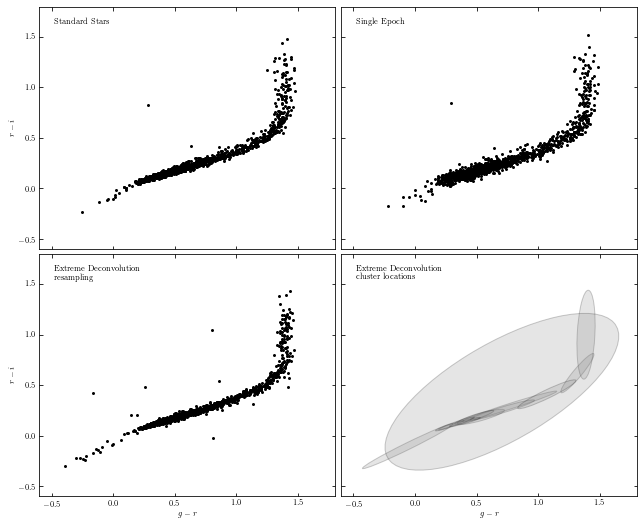

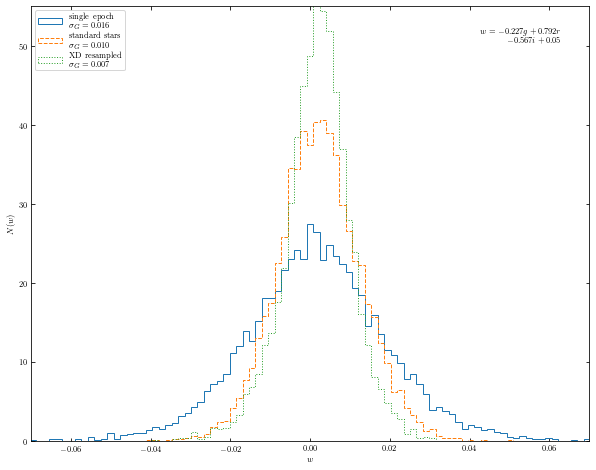

In [ ]:
#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0.12, right=0.95,
                    bottom=0.1, top=0.95,
                    wspace=0.02, hspace=0.02)

# only plot 1/10 of the stars for clarity
ax1 = fig.add_subplot(221)
ax1.scatter(Y[::10, 2], Y[::10, 3], s=9, lw=0, c='k')

ax2 = fig.add_subplot(222)
ax2.scatter(X[::10, 2], X[::10, 3], s=9, lw=0, c='k')

ax3 = fig.add_subplot(223)
ax3.scatter(X_sample[::10, 2], X_sample[::10, 3], s=9, lw=0, c='k')

ax4 = fig.add_subplot(224)
for i in range(clf.n_components):
    draw_ellipse(clf.mu[i, 2:4], clf.V[i, 2:4, 2:4], scales=[2],
                 ec='k', fc='gray', alpha=0.2, ax=ax4)

titles = ["Standard Stars", "Single Epoch",
          "Extreme Deconvolution\n  resampling",
          "Extreme Deconvolution\n  cluster locations"]
ax = [ax1, ax2, ax3, ax4]

for i in range(4):
    ax[i].set_xlim(-0.6, 1.8)
    ax[i].set_ylim(-0.6, 1.8)

    ax[i].xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax[i].yaxis.set_major_locator(plt.MultipleLocator(0.5))

    ax[i].text(0.05, 0.95, titles[i],
               ha='left', va='top', transform=ax[i].transAxes)

    if i in (0, 1):
        ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[i].set_xlabel('$g-r$')

    if i in (1, 3):
        ax[i].yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[i].set_ylabel('$r-i$')

#------------------------------------------------------------
# Second figure: the width of the locus
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

labels = ['single epoch', 'standard stars', 'XD resampled']
linestyles = ['solid', 'dashed', 'dotted']
for data, label, ls in zip((X, Y, X_sample), labels, linestyles):
    g = data[:, 0]
    gr = data[:, 2]
    ri = data[:, 3]

    r = g - gr
    i = r - ri

    mask = (gr > 0.3) & (gr < 1.0)
    g = g[mask]
    r = r[mask]
    i = i[mask]

    w = -0.227 * g + 0.792 * r - 0.567 * i + 0.05

    sigma = sigmaG(w)

    ax.hist(w, bins=np.linspace(-0.08, 0.08, 100), linestyle=ls,
            histtype='step', label=label + '\n\t' + r'$\sigma_G=%.3f$' % sigma,
            density=True)

ax.legend(loc=2)
ax.text(0.95, 0.95, '$w = -0.227g + 0.792r$\n$ - 0.567i + 0.05$',
        transform=ax.transAxes, ha='right', va='top')

ax.set_xlim(-0.07, 0.07)
ax.set_ylim(0, 55)

ax.set_xlabel('$w$')
ax.set_ylabel('$N(w)$')

plt.show()